# Business Understanding
Problem Statements:

  - Pernyataan Masalah 1: Bagaimana cara mengklasifikasikan transaksi sebagai fraud atau non-fraud berdasarkan data transaksi dan informasi pelanggan?

  - Pernyataan Masalah 2: Algoritma machine learning apa yang dapat digunakan untuk mendeteksi transaksi fraud dengan tingkat akurasi dan recall yang tinggi?

Goals:

  - Jawaban untuk Pernyataan Masalah 1: Menggunakan teknik machine learning untuk mengklasifikasikan transaksi berdasarkan fitur-fitur seperti jumlah transaksi, kategori merchant, jenis perangkat, dan data pelanggan.

  - Jawaban untuk Pernyataan Masalah 2: Menggunakan algoritma klasifikasi seperti KNN, Decision Tree, atau Logistic Regression untuk mendeteksi transaksi fraud secara efektif.

Solution Statements

  - Solution Statement 1: Menggunakan KNN untuk mendeteksi transaksi fraud.

  - Solution Statement 2: Menggunakan Logistic Regression untuk membandingkan performa dan meningkatkan akurasi deteksi fraud.

  - Solution Statement 3: Menggunakan Decision tree untuk membandingkan performa dan meningkatkan akurasi deteksi fraud.

  - Improvement: Melakukan hyperparameter tuning dan teknik penanganan data imbalance (misalnya SMOTE) untuk meningkatkan kinerja model dalam mendeteksi kasus fraud yang jarang terjadi.

# Data Understanding

Dataset ini berisi data transaksi bank dengan sejumlah fitur seperti Customer_ID, Transaction_ID, Account_Balance, Transaction_Amount, Merchant_Category, Transaction_Device, Account_Type, Gender, dan target variabel Is_Fraud yang menunjukkan apakah transaksi tersebut fraud atau tidak. Dataset ini mencakup ribuan transaksi dengan proporsi fraud yang relatif kecil dibandingkan transaksi normal.

Dataset terdiri dari 200.000 baris dan 24 kolom dengan tipe data campuran (numerik dan kategorikal), yang merepresentasikan transaksi perbankan dan profil pelanggan.

# Data Loading

**Importing Library**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')


from sklearn.exceptions import UndefinedMetricWarning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, make_scorer, recall_score, f1_score, roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

In [ ]:
# Melihat beberapa baris pertama dari dataset dan memuat data
df = pd.read_csv('/home/crxtan/Downloads/Bank_Transaction_Fraud_Detection.csv')
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


# Exploratory Data Analysis

In [ ]:
# Melihat tipe data dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [ ]:
df.shape

(200000, 24)

In [ ]:
df.columns


Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email'],
      dtype='object')

In [ ]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Customer_ID,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,7c14ad51-781a-4db9-b7bd-67439c175262,3a73a0e5-d4da-45aa-85f3-528413900a35,7902f4ef-9050-4a79-857d-9c2ea3181940,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,6c870d65-76b0-431d-bdf3-9292998e8211,5323737c-bbd2-423f-9c9b-e0433c8f75dc,c0c3d474-f6c2-4c66-9b0e-f9ba75c6f310,e9a82764-1253-4a46-ad34-80e3416fc801,708224d5-192a-4d86-b411-8ec6d1bb274b
Customer_Name,Osha Tella,Hredhaan Khosla,Ekani Nazareth,Yamini Ramachandran,Kritika Rege,Ishanvi Dar,Arya Shroff,Jackson Shere,Bhanumati Ravel,Meera Ganesh
Gender,Male,Female,Male,Female,Female,Male,Female,Male,Male,Female
Age,60,51,20,57,43,54,61,32,52,32
State,Kerala,Maharashtra,Bihar,Tamil Nadu,Punjab,Gujarat,Delhi,Andaman and Nicobar Islands,Madhya Pradesh,Chhattisgarh
City,Thiruvananthapuram,Nashik,Bhagalpur,Chennai,Amritsar,Ahmedabad,New Delhi,Port Blair,Bhopal,Jagdalpur
Bank_Branch,Thiruvananthapuram Branch,Nashik Branch,Bhagalpur Branch,Chennai Branch,Amritsar Branch,Ahmedabad Branch,New Delhi Branch,Port Blair Branch,Bhopal Branch,Jagdalpur Branch
Account_Type,Savings,Business,Savings,Business,Savings,Checking,Business,Business,Business,Business
Transaction_ID,4fa3208f-9e23-42dc-b330-844829d0c12c,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,e41c55f9-c016-4ff3-872b-cae72467c75c,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,f8e6ac6f-81a1-4985-bf12-f60967d852ef,af5f667c-d064-4083-bfb7-83396111a3da,b1355810-d246-4aeb-9932-347f32646172,c86a000c-d81f-40be-acdf-77fc072fd808,323cc683-b0dc-40ee-a519-3b5dc96c7ed8,9fad31ea-2770-4d80-a0ea-00972d5f02cc
Transaction_Date,23-01-2025,11-01-2025,25-01-2025,19-01-2025,30-01-2025,25-01-2025,04-01-2025,16-01-2025,25-01-2025,02-01-2025


In [ ]:
#Melihat data sebaran deskriptif
df.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,44.015110,49538.015554,52437.988784,0.050440
std,15.288774,28551.874004,27399.507128,0.218852
min,18.000000,10.290000,5000.820000,0.000000
25%,31.000000,24851.345000,28742.395000,0.000000
50%,44.000000,49502.440000,52372.555000,0.000000
75%,57.000000,74314.625000,76147.670000,0.000000
max,70.000000,98999.980000,99999.950000,1.000000


In [ ]:
#Cek missing values
df.isna().sum()

Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

Tidak terdapat missing values


In [ ]:
#Cek duplikasi data
df.duplicated().sum()

np.int64(0)

Tidak ada duplikasi data

In [ ]:
# Cek jumlah values unik
df.nunique()

Customer_ID                200000
Customer_Name              142699
Gender                          2
Age                            53
State                          34
City                          145
Bank_Branch                   145
Account_Type                    3
Transaction_ID             200000
Transaction_Date               31
Transaction_Time            77856
Transaction_Amount         197978
Merchant_ID                200000
Transaction_Type                5
Merchant_Category               6
Account_Balance            197954
Transaction_Device             20
Transaction_Location          148
Device_Type                     4
Is_Fraud                        2
Transaction_Currency            1
Customer_Contact             9000
Transaction_Description       172
Customer_Email               4779
dtype: int64

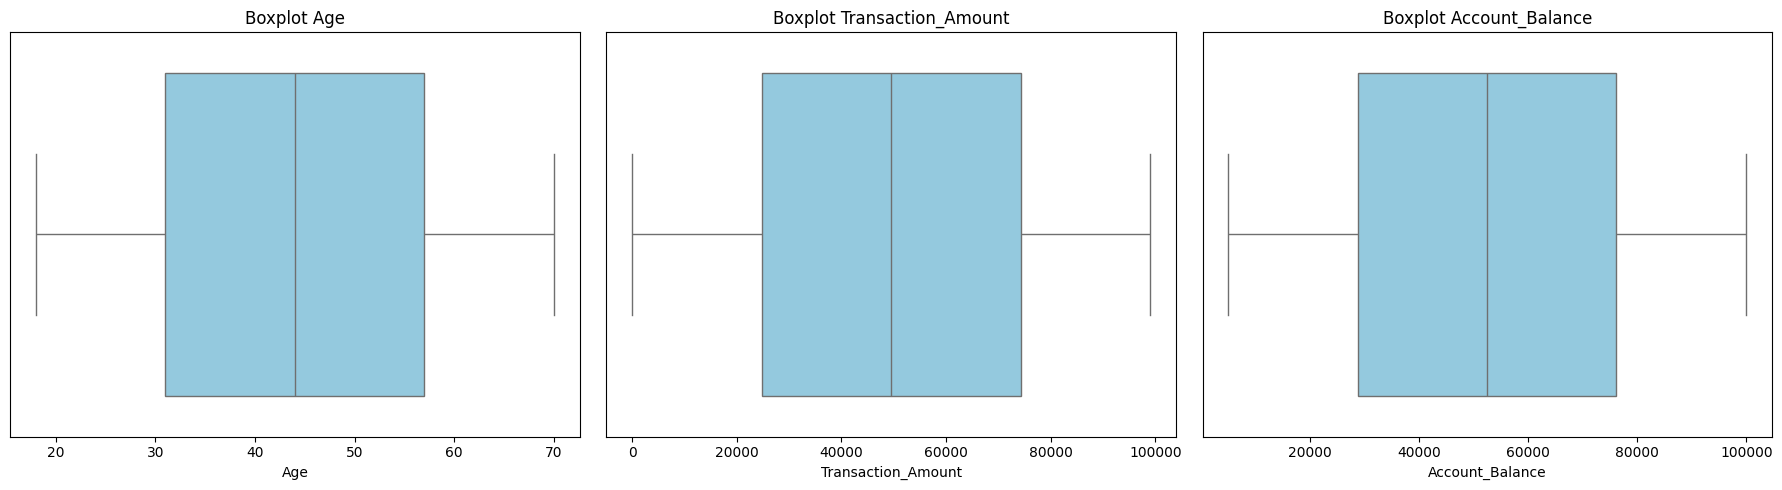

In [ ]:
# Kolom numerik yang akan diplot
numerical_cols = ['Age', 'Transaction_Amount', 'Account_Balance']

# Buat figure dengan 1 baris dan 3 kolom
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loop untuk membuat boxplot tiap kolom di subplot masing-masing
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot {col}')
    axes[i].set_xlabel(col)
    axes[i].set_yticks([])  # sembunyikan ticks y agar lebih rapi

plt.tight_layout()
plt.show()

Tidak terdapat outlier pada data diatas

## Univariate Analysis


In [ ]:
numerical_cols = df.select_dtypes(include=[np.number, 'datetime']).columns
categorical_cols = df.select_dtypes(exclude=[np.number, 'datetime']).columns

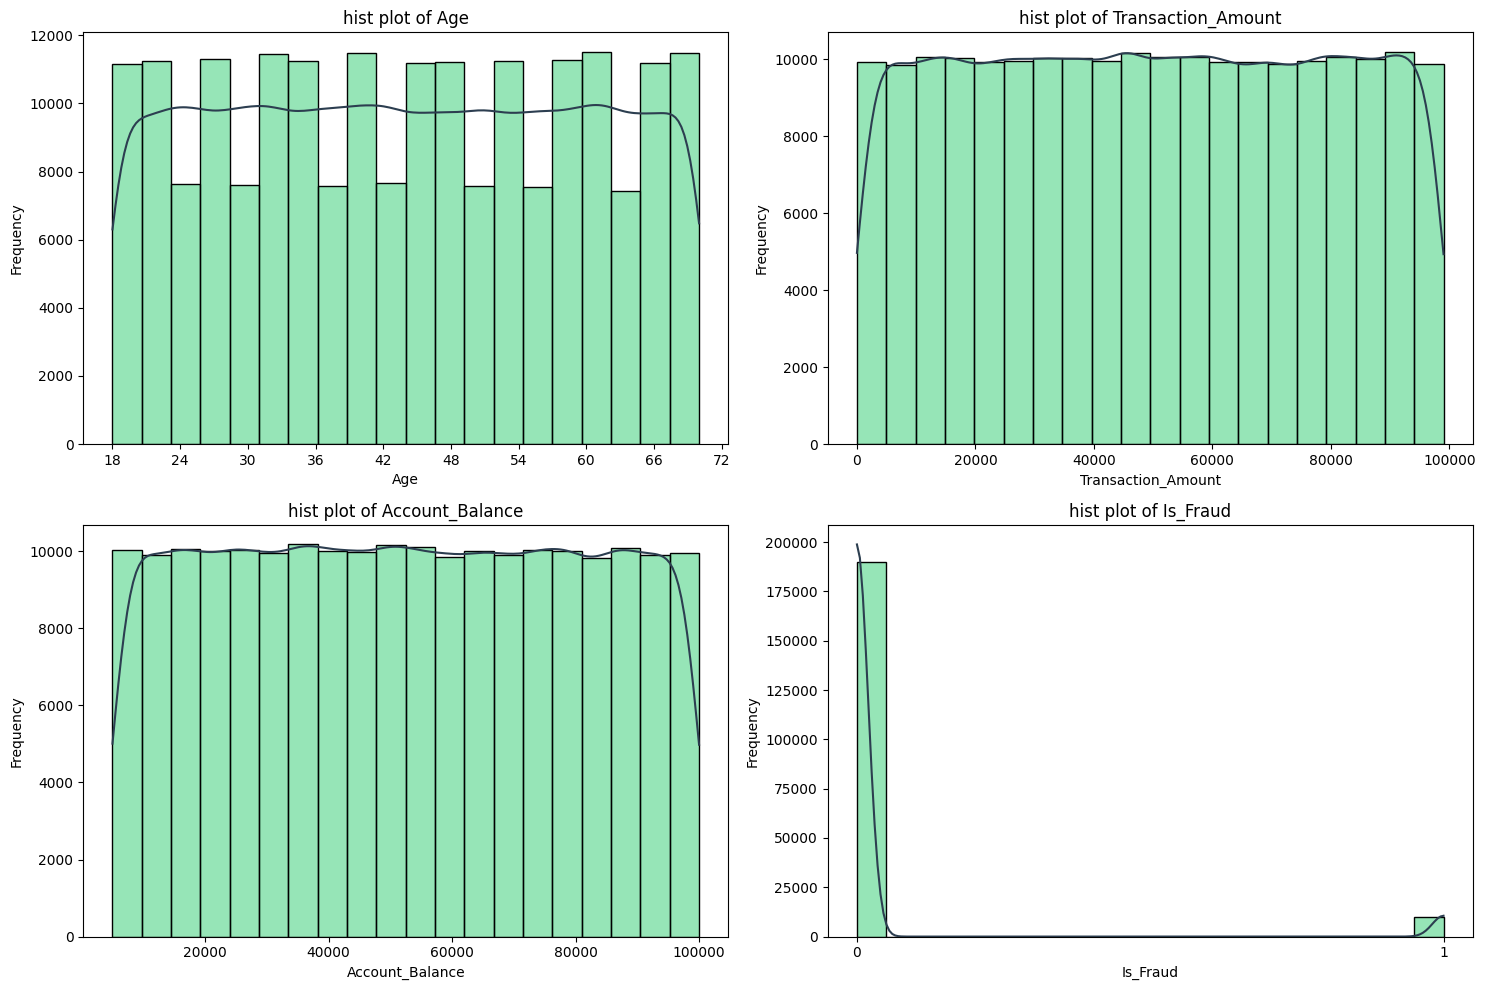

In [ ]:
num_cols_to_plot = [col for col in numerical_cols if col not in ('Transaction_year')]
num_rows = int(np.ceil(len(num_cols_to_plot) / 2))
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
axes = axes.ravel()
for i, col in enumerate(num_cols_to_plot):
    ax = sns.histplot(df[col], ax=axes[i], kde=True, bins=20, color='#2ECC71')
    if ax.lines and hasattr(ax.lines[0], 'set_color'):
        ax.lines[0].set_color('#2C3E50')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'hist plot of {col}')
    if col in ['Theft_Date', 'Report_Date']:
        axes[i].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y' , tz=None))
        fig.autofmt_xdate(rotation=45)
    else:

      if df[col].dtype == 'int64':
        axes[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
if len(axes) > len(numerical_cols):
    for i in range(len(numerical_cols), len(axes)):
        if axes[i] in fig.axes:
            fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Insight :**

- Imbalanced Fraud Data: Kasus fraud sangat jarang dibandingkan non-fraud. Ini adalah temuan paling penting yang mempengaruhi strategi pemodelan.
- No Simple Linear Patterns for Fraud (Age & Amount): Kejadian fraud tidak secara langsung atau sederhana terkait dengan usia atau jumlah transaksi. Perlu eksplorasi fitur lain dan pola yang lebih kompleks.
- Anomalous Numerical Distributions: Distribusi seragam untuk Age, Transaction_Amount, dan Account_Balance sangat tidak biasa untuk data riil. Jika data ini asli, perlu penyelidikan lebih lanjut; jika sintetis, ini adalah batasan interpretasi.
- Geographic Variation in Transaction Value: Rata-rata jumlah transaksi bervariasi signifikan antar kota, menunjukkan potensi segmentasi geografis.
- Initial Demographic Overview: Visualisasi awal memberikan pemahaman dasar tentang distribusi pelanggan dan aktivitas transaksi berdasarkan kategori seperti jenis akun, sektor merchant, atau lokasi.

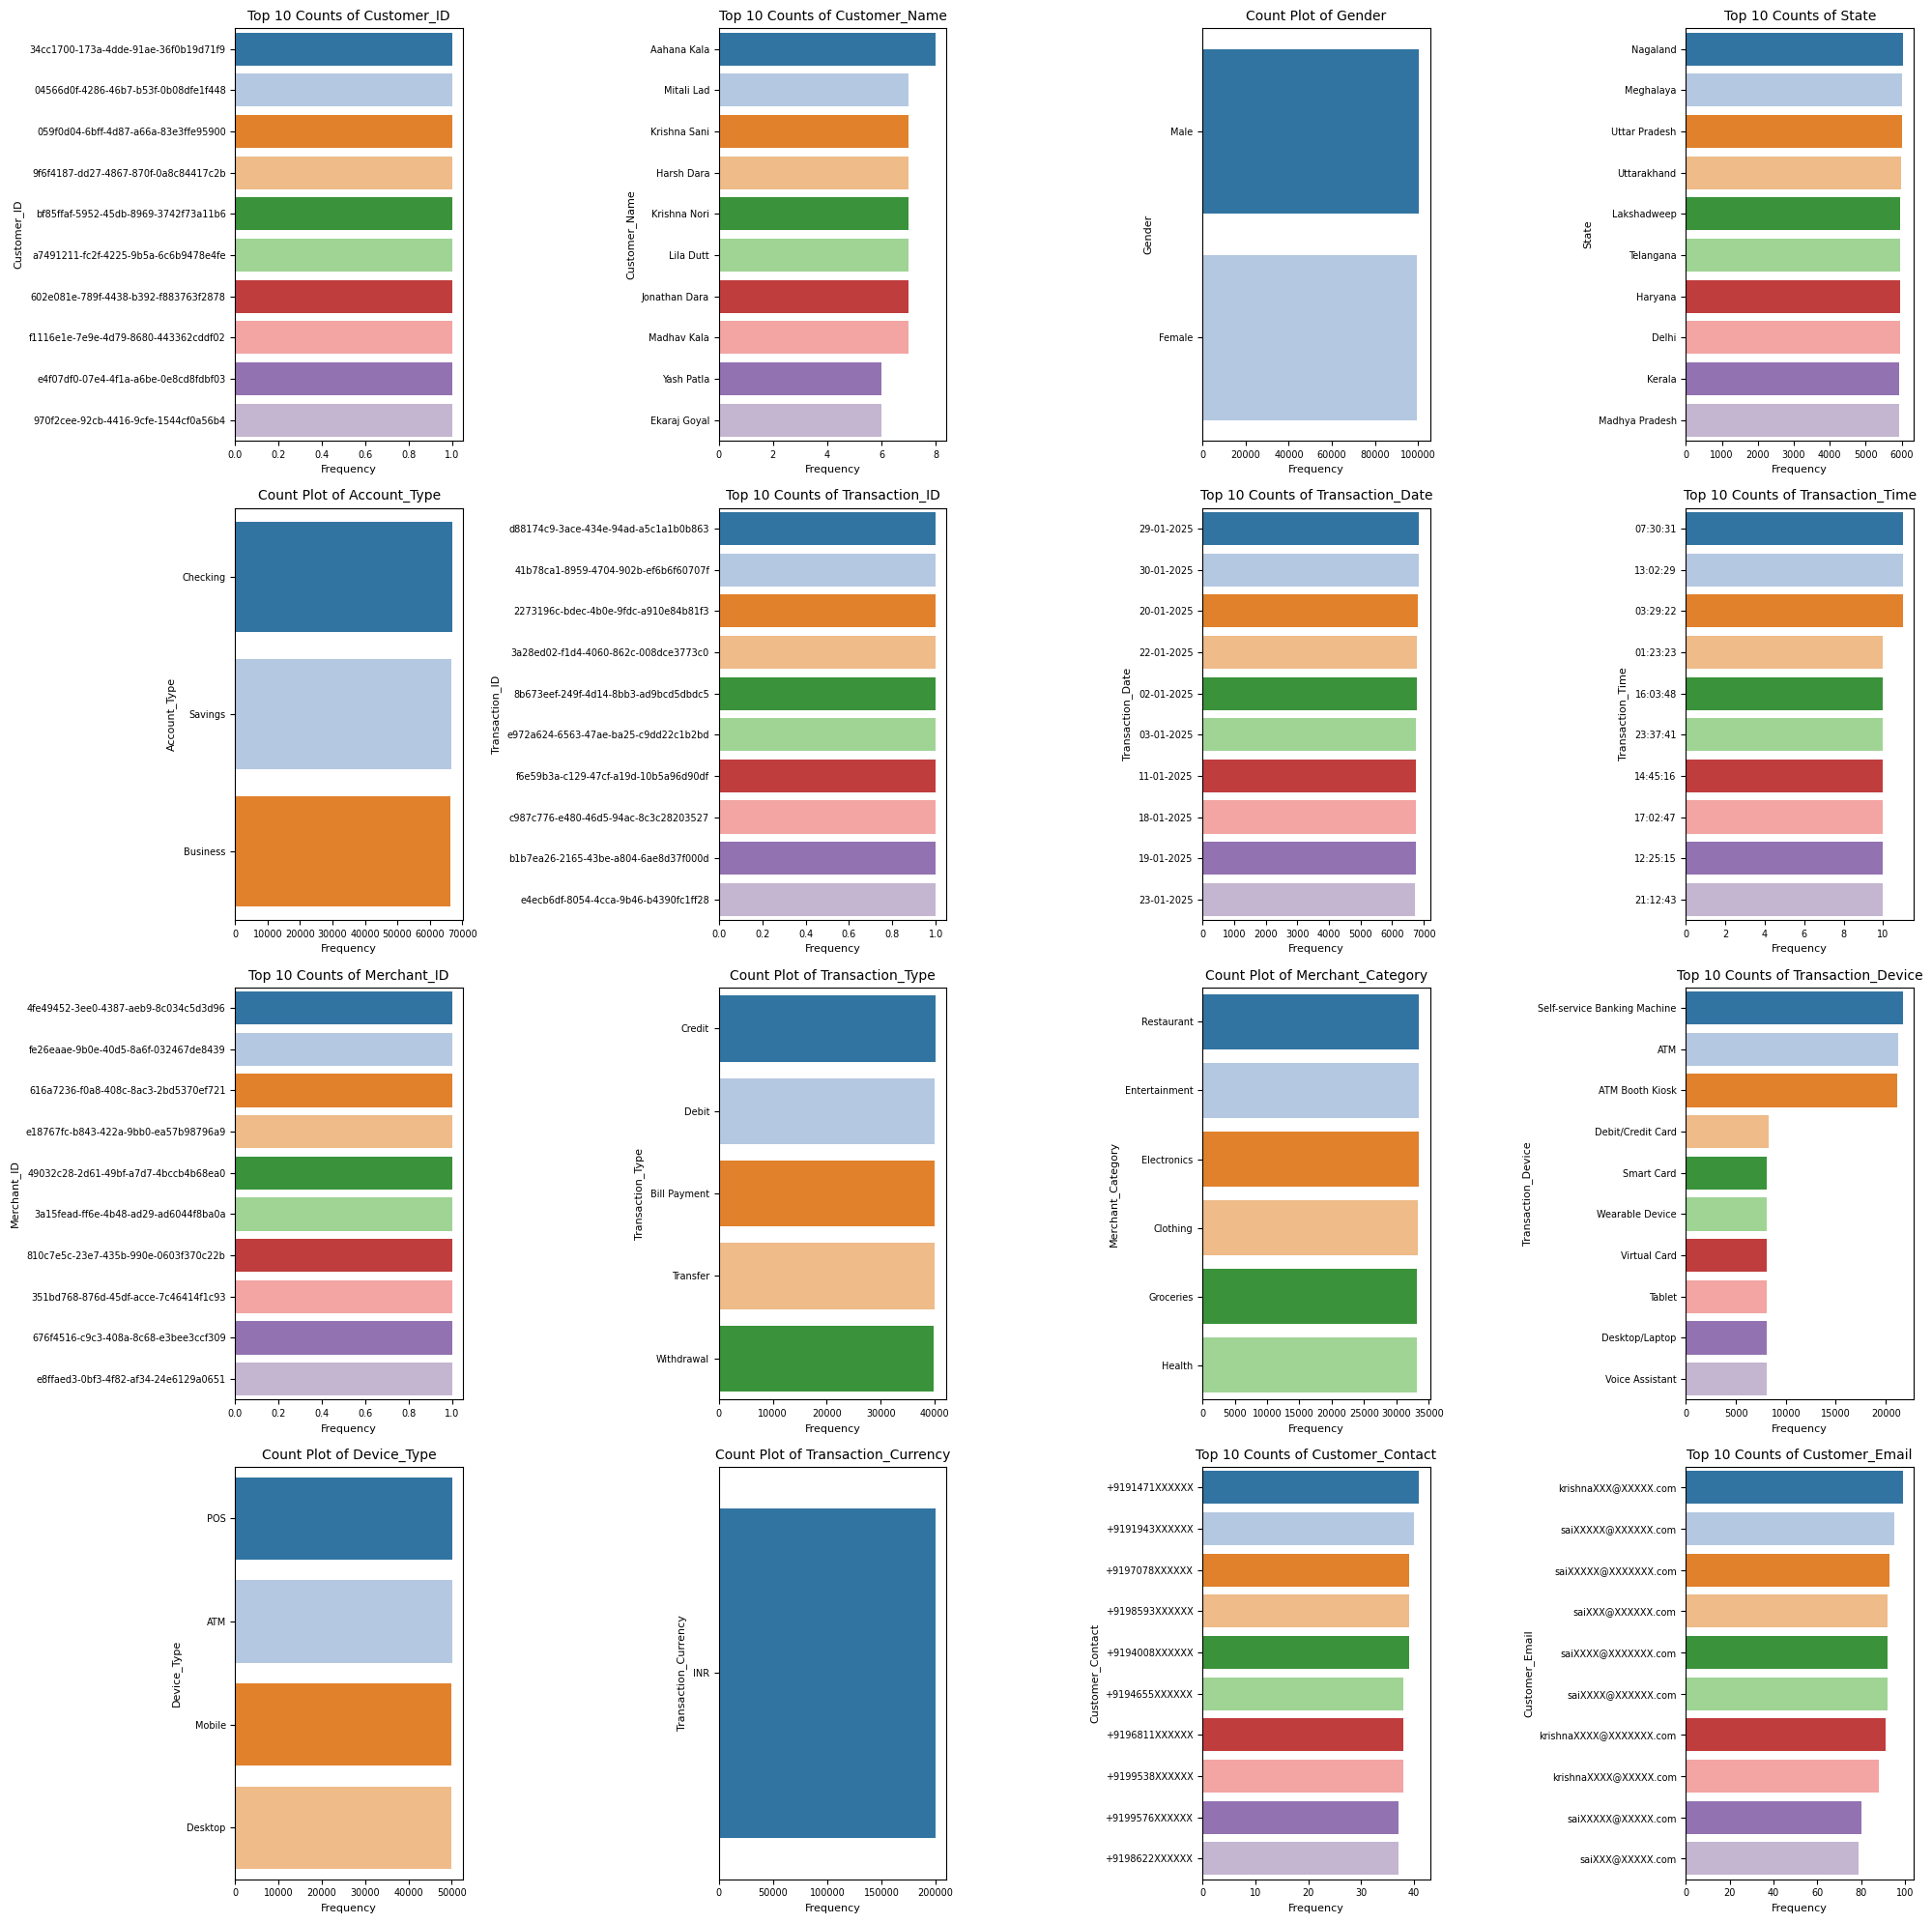

In [ ]:
# Exclude specific columns from plotting
cat_cols_to_plot = [
    col for col in categorical_cols
    if col not in ('City', 'Bank_Branch', 'Transaction_Location', 'Transaction_Description')
]

num_rows = 4
num_cols = 4
num_plots = len(cat_cols_to_plot)

# Custom palette
custom_palette = sns.color_palette("tab20", n_colors=10) # Sesuaikan n_colors jika Anda punya lebih dari 10 kategori teratas

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
axes = axes.ravel()

for i, col in enumerate(cat_cols_to_plot):
    if i >= len(axes):
        print(f"Peringatan: Hanya {len(axes)} plot pertama yang akan dibuat.")
        break

    count_prim = df[col].value_counts().sort_values(ascending=False)
    top_n = 10
    if len(count_prim) > top_n:
        count_prim = count_prim.head(top_n)
        sns.barplot(y=count_prim.index, x=count_prim.values, ax=axes[i], palette=custom_palette)
        axes[i].set_title(f'Top {top_n} Counts of {col}', fontsize=10)
    else:
        sns.barplot(y=count_prim.index, x=count_prim.values, ax=axes[i], palette=custom_palette)
        axes[i].set_title(f'Count Plot of {col}', fontsize=10)

    axes[i].set_ylabel(col, fontsize=8)
    axes[i].set_xlabel('Frequency', fontsize=8)
    axes[i].tick_params(axis='both', which='major', labelsize=7)



if len(axes) > num_plots:
    for i in range(num_plots, len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Insight :**

- Imbalance Data is THE Major Challenge: Temuan paling konsisten adalah ketidakseimbangan kelas yang parah pada variabel Is_Fraud. Ini adalah prioritas utama untuk diatasi dalam tahap pemodelan deteksi fraud.
- Suspicion of Synthetic Data: Distribusi seragam pada fitur numerik (Age, Transaction_Amount, Account_Balance) sangat mengindikasikan bahwa dataset ini mungkin sintetis atau buatan. Hal ini penting karena insight yang didapat mungkin tidak sepenuhnya mencerminkan pola dalam data transaksi dunia nyata.
- Fraud is Not Simple: Dari visualisasi awal, fraud tidak menunjukkan korelasi linier yang jelas dengan usia atau jumlah transaksi, dan polanya serupa antar gender. Ini berarti perlu eksplorasi fitur lain atau penggunaan model yang lebih canggih untuk menemukan pola fraud.
- Geographic Variation Matters: Terdapat perbedaan signifikan dalam rata-rata nilai transaksi antar kota, menunjukkan potensi untuk segmentasi atau strategi berbasis lokasi.
- Basic Categorical Insights: Kita mendapatkan gambaran umum tentang demografi pelanggan dan pola transaksi yang dominan (jenis akun, perangkat, kategori merchant, mata uang, dll.).
- Data Uniqueness Check Needed: Untuk ID dan timestamp, frekuensi tinggi mungkin mengindikasikan aktivitas pelanggan yang tinggi atau adanya duplikasi/issue pada data.

## Bivariate analysis

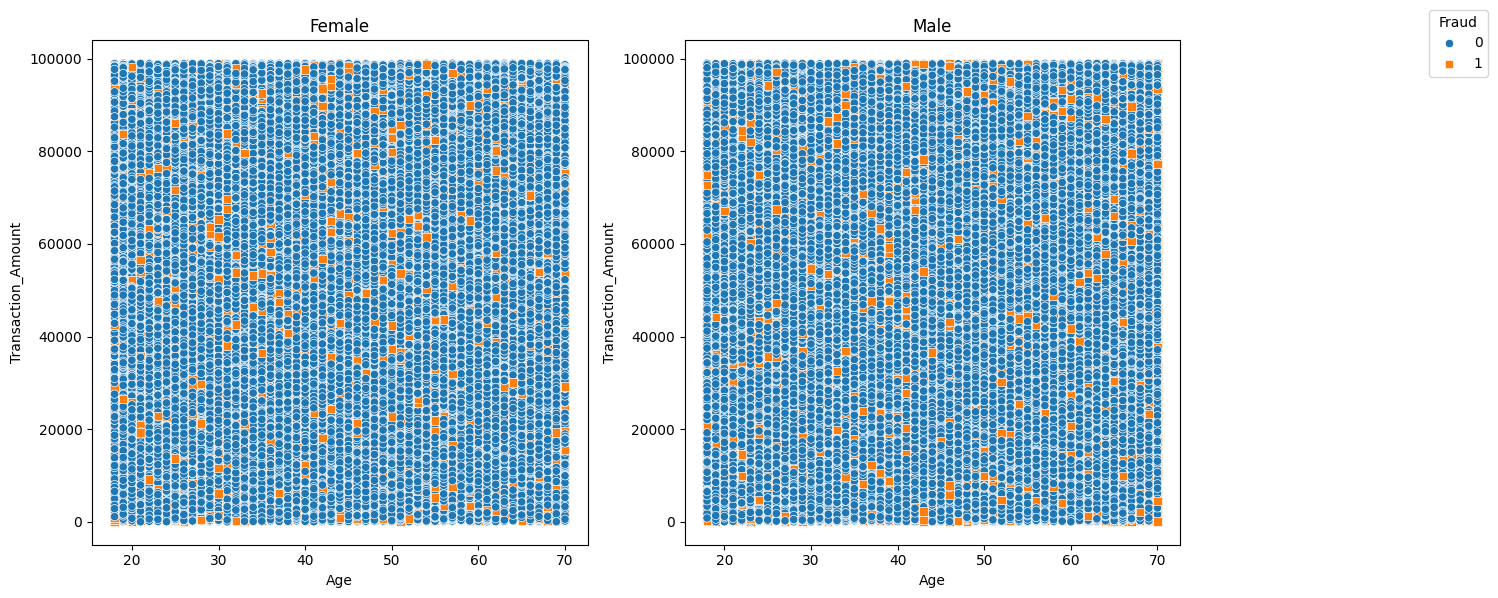

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Female
sns.scatterplot(data=df[df['Gender'] == 'Female'],
                y='Transaction_Amount', x='Age',
                hue='Is_Fraud', style='Is_Fraud',
                markers=['o', 's'],
                ax=axes[0])
axes[0].set_title('Female')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Transaction_Amount')
axes[0].get_legend().remove()

# Plot for Male
sns.scatterplot(data=df[df['Gender'] == 'Male'],
                y='Transaction_Amount', x='Age',
                hue='Is_Fraud', style='Is_Fraud',
                markers=['o', 's'],
                ax=axes[1])
axes[1].set_title('Male')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Transaction_Amount')
axes[1].get_legend().remove()


handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.25, 1), title='Fraud')

plt.tight_layout()
plt.show()

**Insight :**

- Ketidakseimbangan Kelas Fraud yang Ekstrem: Dataset ini memiliki jumlah transaksi non-fraud yang jauh lebih banyak daripada transaksi fraud. Ini adalah masalah utama yang harus ditangani dalam pemodelan.
- Kecurigaan Data Sintetis: Distribusi fitur numerik (Age, Transaction_Amount, Account_Balance) yang sangat seragam menunjukkan kuatnya kemungkinan bahwa data ini adalah sintetis. Ini penting untuk interpretasi karena insight yang didapat mungkin tidak sepenuhnya mencerminkan karakteristik data transaksi dunia nyata.
- Pola Fraud yang Tidak Sederhana: Tidak ada korelasi linier yang jelas antara Age atau Transaction_Amount dengan kejadian fraud, dan pola ini terlihat serupa antara gender. Ini menyiratkan bahwa model deteksi fraud perlu mencari pola yang lebih kompleks atau menggunakan fitur lain untuk identifikasi.
- Variasi Geografis: Terdapat perbedaan signifikan dalam rata-rata jumlah transaksi antar kota, menunjukkan bahwa lokasi adalah faktor penting yang mempengaruhi nilai transaksi.
- Pemahaman Dasar Kategorikal: Visualisasi awal memberikan gambaran frekuensi kategori utama seperti jenis akun, sektor merchant, perangkat transaksi, dan asal negara, yang penting untuk pemahaman umum tentang dataset.

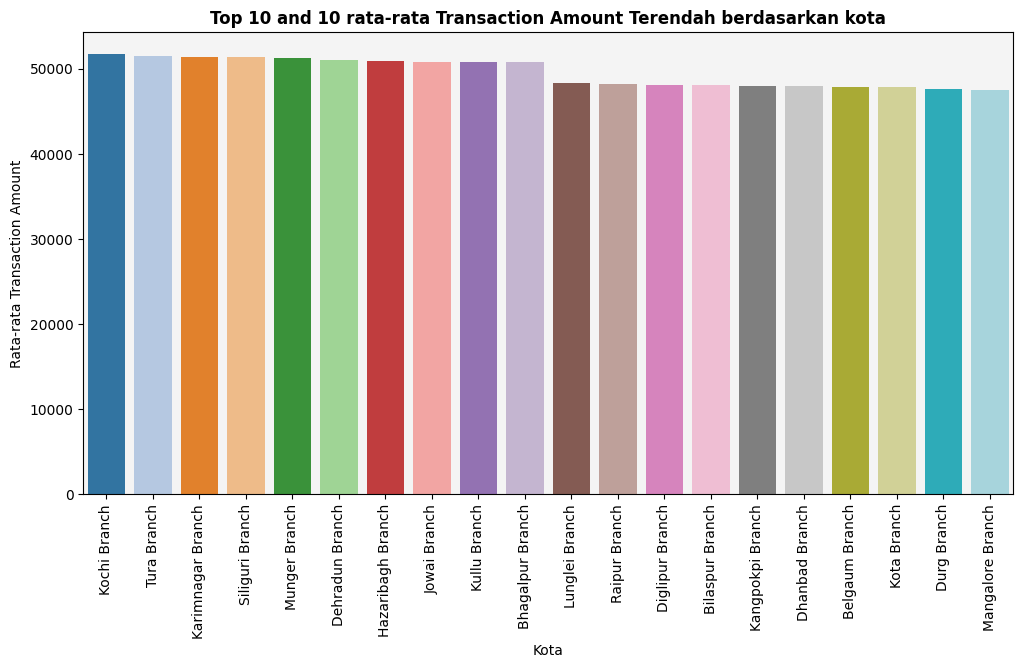

In [ ]:
rata1 = df.groupby('Bank_Branch')['Transaction_Amount'].mean().sort_values(ascending=False)


top_10_Bank_Branch = rata1.head(10)
bottom_10_Bank_Branch = rata1.tail(10)


combined_data = pd.concat([top_10_Bank_Branch, bottom_10_Bank_Branch])


plt.figure(figsize=(12, 6))
ax = sns.barplot(x=combined_data.index, y=combined_data.values, palette='tab20')
plt.title('Top 10 and 10 rata-rata Transaction Amount Terendah berdasarkan kota', fontsize=12, fontweight='bold')
plt.xlabel('Kota')
plt.ylabel('Rata-rata Transaction Amount')

ax.set_facecolor("#f4f4f4")
ax.grid(False)
plt.xticks(rotation=90)
plt.show()

**Insight :**

- Rata-rata Transaksi yang Konsisten Tinggi: Semua kota yang ditampilkan dalam grafik ini memiliki rata-rata Transaction Amount yang sangat tinggi, berada di kisaran 47.000 hingga 52.000. Tidak ada perbedaan signifikan atau "terendah" yang jelas di antara kota-kota ini, kecuali sedikit fluktuasi di antara nilai rata-rata yang tinggi tersebut.

- Kota dengan Rata-rata Transaksi Tertinggi:
  - Kochi Branch memiliki rata-rata Transaction Amount tertinggi, sedikit di atas 52.000.
  - Diikuti oleh Tura Branch, Siliguri Branch, Karimnagar Branch, Munger Branch, dan Dehradun Branch yang semuanya memiliki rata-rata di atas 50.000.

  - Rentang Rata-rata yang Sempit: Perbedaan antara rata-rata transaksi tertinggi (Kochi Branch) dan terendah di antara 20 kota yang ditampilkan ini relatif kecil (sekitar 5.000 atau kurang). Ini menunjukkan bahwa kota-kota yang masuk dalam daftar ini cenderung memiliki pola transaksi dengan nilai rata-rata yang serupa, yaitu tinggi.

  - Sebaran Kota: Grafik ini menunjukkan cabang-cabang (Branch) yang tersebar di berbagai kota. Ini mengindikasikan bahwa operasi transaksi dengan nilai rata-rata tinggi tidak hanya terkonsentrasi di satu wilayah saja, melainkan terjadi di beberapa lokasi berbeda.

Analisis:

- Fokus pada Transaksi Bernilai Tinggi: Data ini menyoroti cabang-cabang atau kota-kota di mana rata-rata nilai transaksi cenderung tinggi. Ini bisa menjadi fokus untuk strategi bisnis yang menargetkan pelanggan dengan daya beli tinggi atau transaksi berskala besar.

- Potensi Variabilitas Data: Meskipun rata-rata transaksi tinggi, kita tidak mengetahui distribusi data di setiap kota. Rata-rata yang tinggi bisa berasal dari:
  -  Banyak transaksi kecil dan beberapa transaksi sangat besar.
  - Sebagian besar transaksi memang bernilai tinggi.
  - Perlu melihat box plot atau histogram untuk setiap kota untuk memahami sebaran sebenarnya dan apakah ada outlier yang memengaruhi rata-rata.

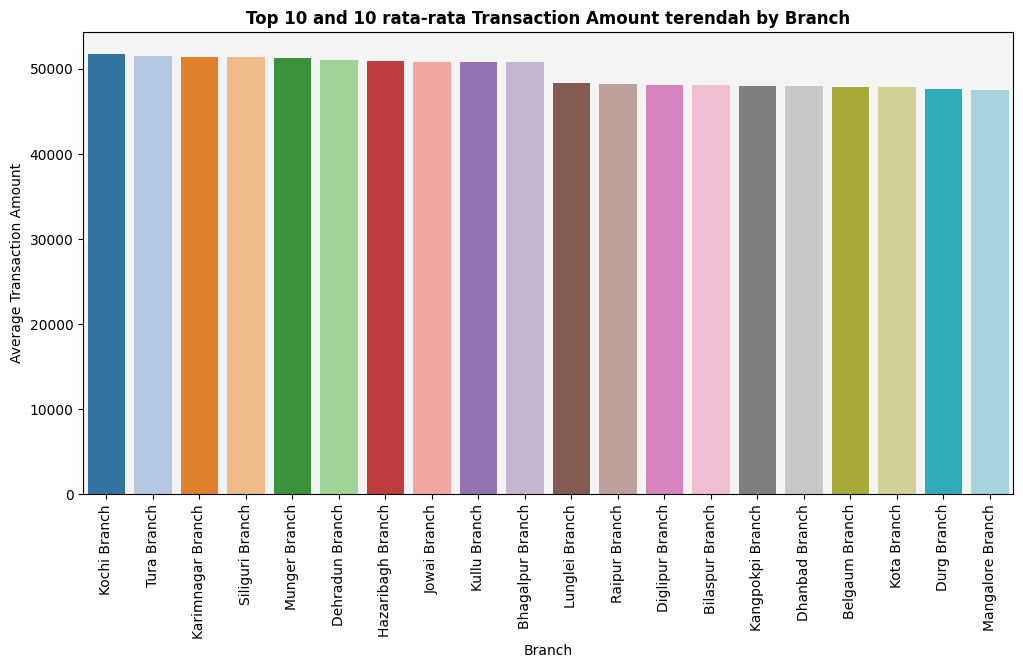

In [ ]:
rata2_data = df.groupby('Bank_Branch')['Transaction_Amount'].mean().sort_values(ascending=False)


top_5_Bank_Branch = rata2_data.head(10)
bottom_5_Bank_Branch = rata2_data.tail(10)


combined_data = pd.concat([top_5_Bank_Branch, bottom_5_Bank_Branch])


plt.figure(figsize=(12, 6))
ax = sns.barplot(x=combined_data.index, y=combined_data.values, palette='tab20')
plt.title('Top 10 and 10 rata-rata Transaction Amount terendah by Branch', fontsize=12, fontweight='bold')
plt.xlabel('Branch')
plt.ylabel('Average Transaction Amount')

ax.set_facecolor("#f4f4f4")
ax.grid(False)
plt.xticks(rotation=90)
plt.show()

**Insight :**

- Ketidakseimbangan Kelas Fraud yang Ekstrem: Ini adalah temuan paling dominan dan kritis yang berulang di beberapa plot. Jumlah transaksi non-fraud jauh lebih banyak daripada transaksi fraud, mengindikasikan kebutuhan akan strategi khusus dalam pemodelan.
- Dugaan Kuat Data Sintetis: Distribusi yang sangat seragam pada fitur numerik (Age, Transaction_Amount, Account_Balance) dan sebaran titik yang merata pada scatter plots sangat menunjukkan bahwa data ini kemungkinan besar adalah buatan atau sintetis. Hal ini penting karena insight yang didapat mungkin tidak sepenuhnya mencerminkan karakteristik data transaksi dunia nyata.
- Pola Fraud Tidak Sederhana: Dari visualisasi Age vs Transaction_Amount, tidak ada korelasi linier yang jelas atau klustering transaksi fraud. Pola ini terlihat serupa antara gender. Ini menyiratkan bahwa model deteksi fraud harus mencari pola yang lebih kompleks atau bergantung pada fitur lain.
Variasi Geografis dan Cabang:

    - Terdapat perbedaan signifikan dalam rata-rata jumlah transaksi antar kota, menunjukkan potensi untuk segmentasi geografis.
    - Namun, rata-rata jumlah transaksi antar cabang bank (Bank_Branch) menunjukkan homogenitas yang tinggi, dengan sedikit perbedaan antara cabang tertinggi dan terendah. Ini menyiratkan bahwa cabang-cabang ini memiliki profil transaksi rata-rata yang serupa, atau kembali lagi, menunjukkan pola data sintetis yang tidak memiliki variasi dunia nyata.

- Pemahaman Frekuensi Kategorikal Dasar: Visualisasi count plots memberikan pemahaman awal tentang distribusi frekuensi kategori dalam berbagai fitur seperti gender, tipe akun, kategori merchant, dan perangkat transaksi, yang penting untuk pemahaman umum dataset.

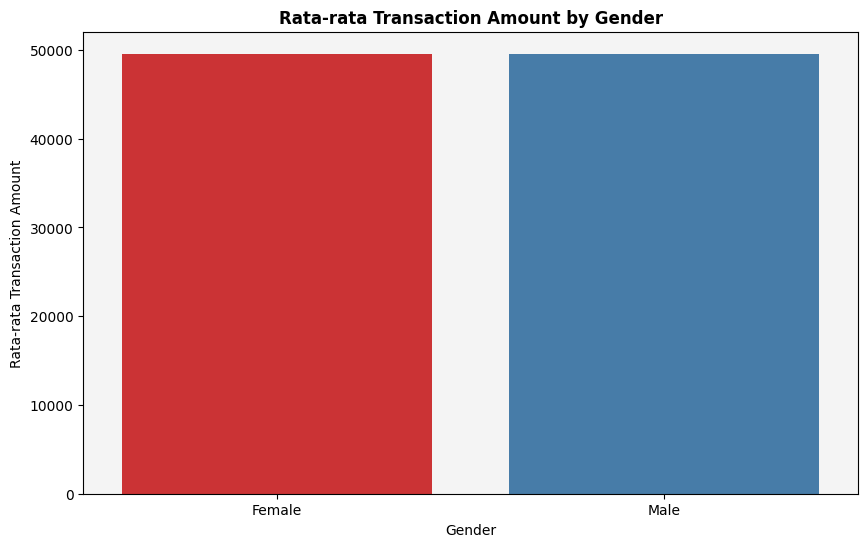

In [ ]:
rata3_data = df.groupby('Gender')['Transaction_Amount'].mean()

plt.figure(figsize = (10,6))
ax = sns.barplot(x = rata3_data.index, y = rata3_data.values, palette = 'Set1')
plt.title('Rata-rata Transaction Amount by Gender', fontsize = 12, fontweight = 'bold')
plt.xlabel('Gender')
plt.ylabel('Rata-rata Transaction Amount')


ax.set_facecolor("#f4f4f4")


ax.grid(False)

plt.show()

**Insight :**

- Rata-rata Transaksi yang Sangat Mirip: Rata-rata Transaction Amount untuk gender Female dan Male hampir identik. Kedua gender menunjukkan rata-rata transaksi sekitar 49.000 (tidak ada label numerik persis, tapi visualnya sangat dekat dengan 50.000).
- Tidak Ada Perbedaan Signifikan: Berdasarkan grafik ini, tidak ada perbedaan yang signifikan secara praktis dalam rata-rata nilai transaksi antara pria dan wanita.

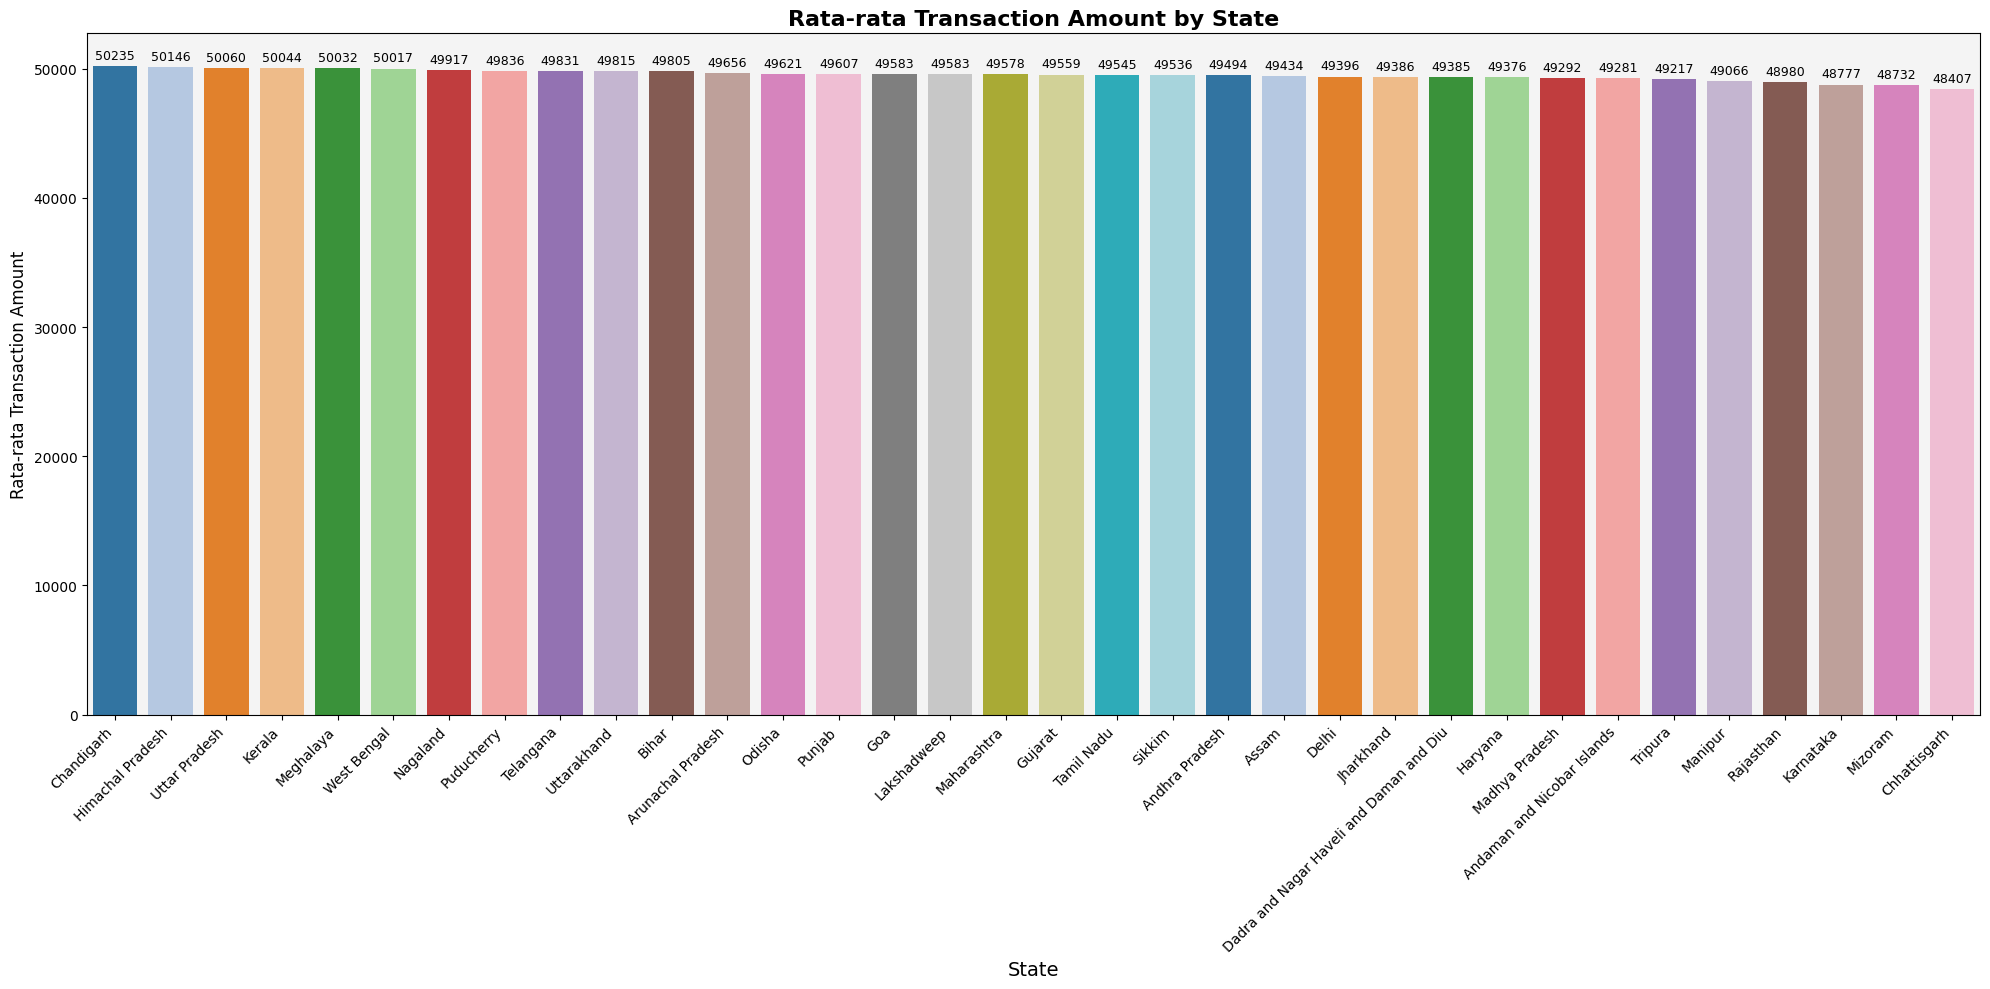

In [ ]:
rata4_data = df.groupby('State')['Transaction_Amount'].mean().sort_values(ascending=False)

plt.figure(figsize = (20,10))
ax = sns.barplot(x = rata4_data.index, y = rata4_data.values, palette = 'tab20')
plt.title('Rata-rata Transaction Amount by State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 14)
plt.ylabel('Rata-rata Transaction Amount', fontsize = 12)

ax.set_facecolor("#f4f4f4")

ax.grid(False)
plt.xticks(rotation=45, ha='right', fontsize=10)


for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=9, color='black', padding=3)


plt.tight_layout() # Untuk memastikan semua elemen pas di dalam figure
plt.show()

**Insight :**

- Rata-rata Transaksi yang Sangat Konsisten di Seluruh Negara Bagian: Mirip dengan grafik sebelumnya (berdasarkan kota), grafik ini menunjukkan bahwa rata-rata Transaction Amount di sebagian besar negara bagian sangatlah tinggi dan berada dalam rentang yang sempit, yaitu antara sekitar 48.000 hingga 50.000an.

- Negara Bagian dengan Rata-rata Tertinggi:

  - Chandigarh menempati posisi teratas dengan rata-rata transaksi tertinggi (sekitar 50.235).
  - Diikuti oleh Himachal Pradesh (50.146) dan Uttar Pradesh (50.080), yang juga memiliki rata-rata di atas 50.000.

- Rentang Perbedaan yang Sangat Kecil: Perbedaan antara rata-rata transaksi tertinggi (Chandigarh ~50.235) dan terendah di antara negara bagian yang ditampilkan (misalnya, Chhattisgarh ~48.732) sangatlah kecil. Ini menunjukkan bahwa rata-rata nilai transaksi per transaksi tidak banyak bervariasi antar negara bagian.

- Sebaran Geografis: Data mencakup banyak negara bagian, menunjukkan bahwa pola transaksi bernilai rata-rata tinggi ini tidak terbatas pada satu atau dua wilayah geografis, melainkan tersebar luas.

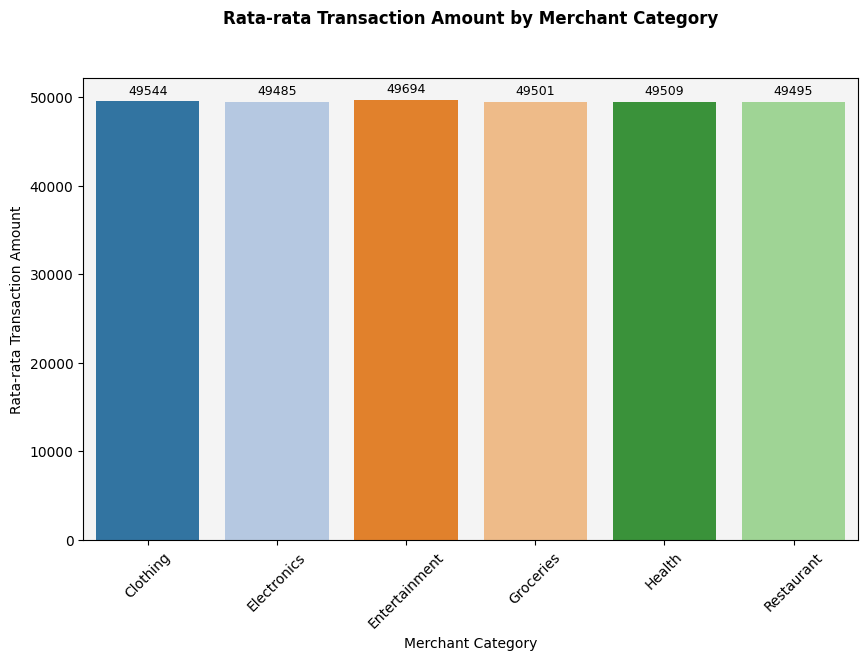

In [ ]:
rata5_data = df.groupby('Merchant_Category')['Transaction_Amount'].mean()

plt.figure(figsize = (10,6))
p = sns.barplot(y = rata5_data.values, x = rata5_data.index, palette = 'tab20')
plt.title('Rata-rata Transaction Amount by Merchant Category', fontsize = 12, fontweight = 'bold' , loc = 'center' , y = 1.1)
plt.xlabel('Merchant Category')
plt.ylabel('Rata-rata Transaction Amount')

for container in p.containers:
    p.bar_label(container, fmt='%.0f', fontsize=9, color='black', padding=3)

p.set_facecolor("#f4f4f4")


p.grid(False)
plt.xticks(rotation=45)
plt.show()



**Insight :**
- Konsistensi Rata-rata Nilai Transaksi: Sama seperti grafik-grafik sebelumnya (berdasarkan kota, gender, dan negara bagian), rata-rata Transaction Amount di berbagai kategori pedagang juga sangat konsisten dan berada di kisaran yang sangat sempit, yaitu antara 49.000 hingga 49.700.
- Perbedaan yang Sangat Kecil: Perbedaan rata-rata transaksi antara kategori yang berbeda (misalnya, Entertainment ~49.694 sebagai yang tertinggi dan Clothing ~49.544 sebagai yang terendah di antara yang ditampilkan) sangatlah minimal.

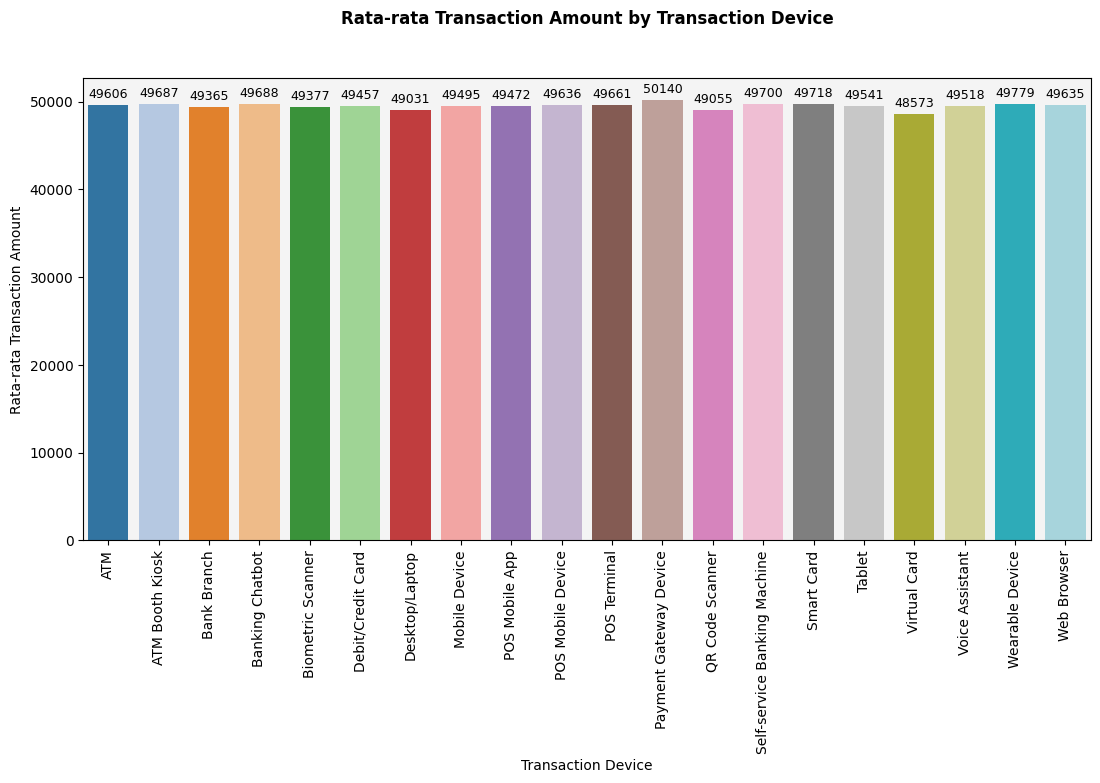

In [ ]:
rata7_data = df.groupby('Transaction_Device')['Transaction_Amount'].mean()

plt.figure(figsize = (13,6))
p = sns.barplot(y = rata7_data.values, x = rata7_data.index, palette = 'tab20')
plt.title('Rata-rata Transaction Amount by Transaction Device', fontsize = 12, fontweight = 'bold' , loc = 'center' , y = 1.1)
plt.xlabel('Transaction Device')
plt.ylabel('Rata-rata Transaction Amount')

for container in p.containers:
    p.bar_label(container, fmt='%.0f', fontsize=9, color='black', padding=3)

p.set_facecolor("#f4f4f4")

p.grid(False)
plt.xticks(rotation=90)

plt.show()


**Insight :**

- Konsistensi Rata-rata Nilai Transaksi yang Tinggi: Grafik ini kembali menunjukkan pola yang konsisten: rata-rata Transaction Amount untuk hampir semua jenis perangkat transaksi berada dalam kisaran yang sangat sempit, yaitu antara 48.000 hingga 50.000an.
- Perbedaan yang Sangat Minimal: Meskipun ada sedikit fluktuasi, perbedaan antara rata-rata transaksi tertinggi (POS Terminal ~50.140) dan terendah (Voice Assistant ~48.541) di antara perangkat yang ditampilkan sangatlah kecil, tidak melebihi ~2.000.

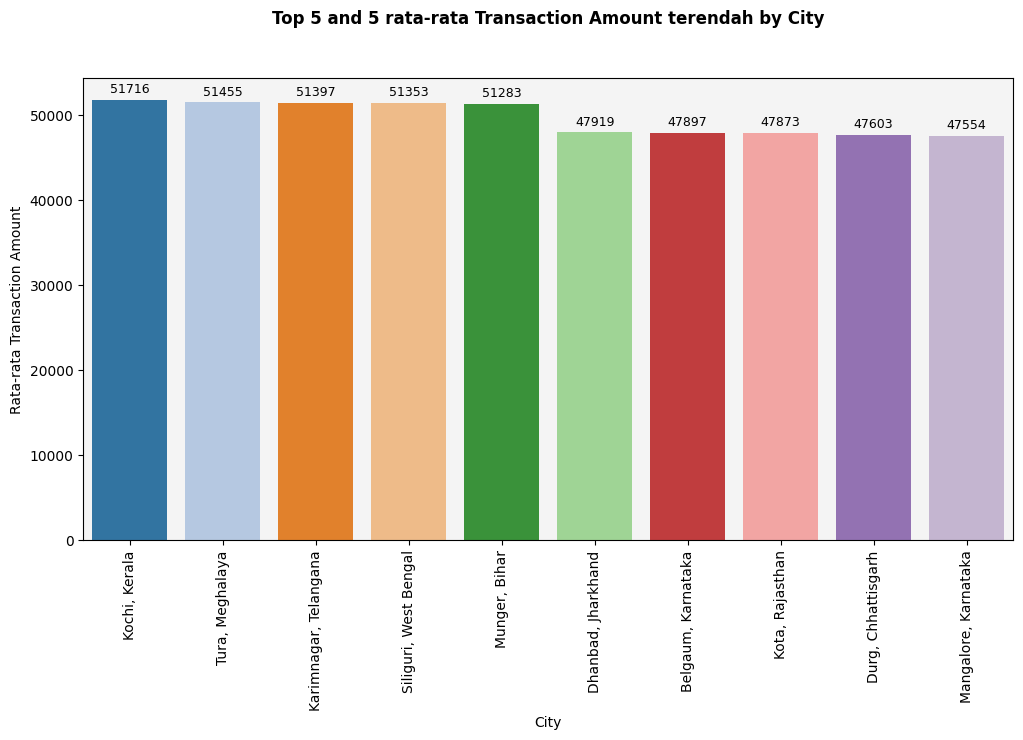

In [ ]:
rata8_data = df.groupby('Transaction_Location')['Transaction_Amount'].mean().sort_values(ascending=False)


top_5_Location = rata8_data.head(5)
bottom_5_Location = rata8_data.tail(5)


combined_data = pd.concat([top_5_Location, bottom_5_Location])


plt.figure(figsize=(12, 6))
ax = sns.barplot(x=combined_data.index, y=combined_data.values, palette='tab20')
plt.title('Top 5 and 5 rata-rata Transaction Amount terendah by City', fontsize=12, fontweight='bold' , loc = 'center' , y = 1.1)
plt.xlabel('City')
plt.ylabel('Rata-rata Transaction Amount')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=9, color='black', padding=3)

ax.set_facecolor("#f4f4f4")

ax.grid(False)
plt.xticks(rotation=90)

plt.show()

**Insight :**

- Rata-rata Transaksi yang Sangat Konsisten di Antara Kota-kota Teratas: Semua kota yang ditampilkan dalam grafik ini memiliki rata-rata Transaction Amount yang sangat tinggi, berkisar antara 47.500 hingga 51.700-an.
Kota dengan Rata-rata Transaksi Tertinggi:

  - Kochi, Kerala menduduki puncak dengan rata-rata Transaction Amount tertinggi, yaitu 51.716.
  - Diikuti oleh Tura, Meghalaya (51.455), Karimnagar, Telangana (51.397), Siliguri, West-Bengal (51.353), dan Munger, Bihar (51.283) sebagai Top 5 kota dengan rata-rata transaksi tertinggi.

- Rentang Perbedaan yang Relatif Kecil: Meskipun ada variasi dari yang tertinggi ke terendah di antara 10 kota ini, perbedaannya hanya sekitar 4.000-an (dari 51.716 hingga 47.554). Ini menunjukkan bahwa kota-kota yang masuk dalam daftar "teratas" ini memiliki pola nilai transaksi rata-rata yang serupa, yaitu tinggi.
- Sebaran Geografis: Kota-kota yang ditampilkan tersebar di berbagai negara bagian (Kerala, Meghalaya, Telangana, West-Bengal, Bihar, Jharkhand, Karnataka, Rajasthan, Chhattisgarh), mengindikasikan bahwa transaksi bernilai rata-rata tinggi tidak terkonsentrasi di satu wilayah saja.

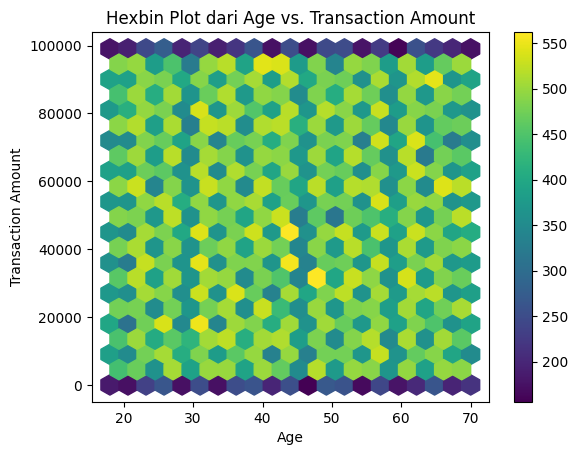

In [ ]:
plt.hexbin(df['Age'], df['Transaction_Amount'], gridsize=20, cmap='viridis')
plt.title('Hexbin Plot dari Age vs. Transaction Amount')
plt.xlabel('Age')
plt.ylabel('Transaction Amount')
plt.colorbar()
plt.show()

**Insight :**

- Konsentrasi Data di Sepanjang Rentang Transaction Amount: Sebagian besar transaksi, terlepas dari usia, cenderung memiliki Transaction Amount yang tersebar di seluruh rentang yang ditampilkan (dari mendekati 0 hingga 100.000). Warna kuning (densitas tertinggi, sekitar 550 transaksi) tersebar di banyak hexbin di seluruh sumbu Y.

- Densitas Tinggi di Rentang Usia Tertentu: Ada area dengan densitas transaksi yang sangat tinggi (warna kuning cerah) yang muncul di beberapa rentang usia tertentu:

  - Sekitar usia 30-35 tahun.
  - Sekitar usia 40-45 tahun.
  - Sekitar usia 50-55 tahun.
  - Sekitar usia 60-65 tahun. Ini menunjukkan adanya kelompok usia di mana volume transaksi (jumlah transaksi) lebih padat, meskipun tidak secara eksklusif berfokus pada nilai Transaction Amount tertentu.

- Jumlah Transaksi Rendah di Batas Usia: Densitas transaksi cenderung lebih rendah (warna ungu gelap hingga hijau gelap) di ujung-ujung rentang usia (di bawah 20 tahun dan di atas 70 tahun). Ini dapat mengindikasikan bahwa jumlah pelanggan atau aktivitas transaksi lebih sedikit di kelompok usia ekstrem ini.

- Absennya Korelasi Kuat antara Usia dan Nilai Transaksi: Tidak ada pola yang jelas yang menunjukkan bahwa seiring bertambahnya usia, Transaction Amount cenderung meningkat atau menurun secara signifikan. Nilai transaksi tinggi maupun rendah terjadi di hampir setiap kelompok usia.

## Multivariate Analysis


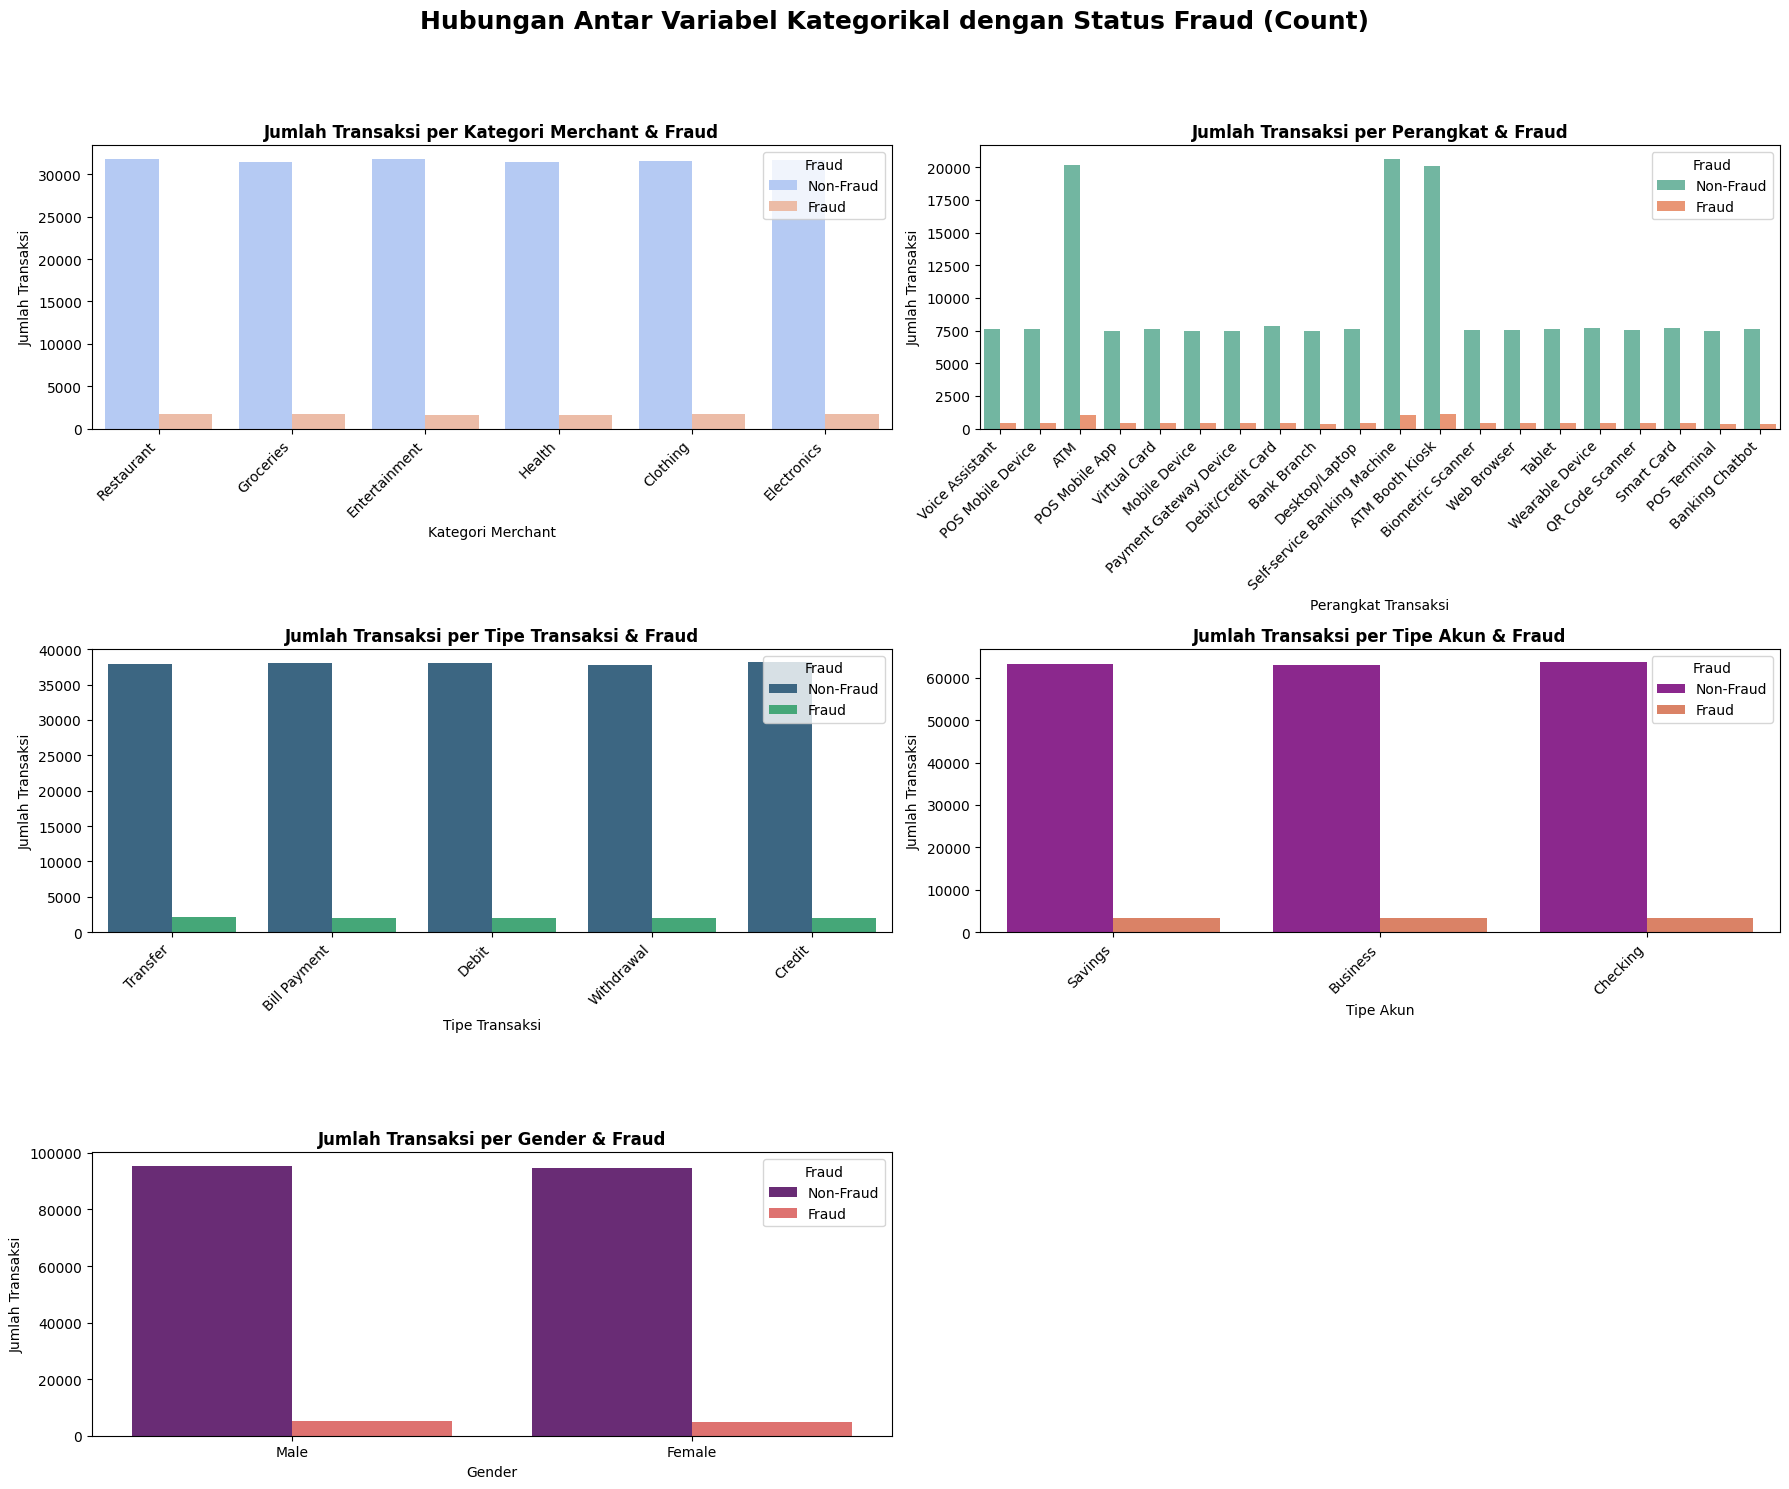

In [ ]:
plt.figure(figsize=(18, 15))
plt.suptitle('Hubungan Antar Variabel Kategorikal dengan Status Fraud (Count)', fontsize=18, fontweight='bold', y=1.02)

# Subplot 1: Merchant_Category vs Is_Fraud
plt.subplot(3, 2, 1)
sns.countplot(data=df, x='Merchant_Category', hue='Is_Fraud', palette='coolwarm')
plt.title('Jumlah Transaksi per Kategori Merchant & Fraud', fontsize=12, fontweight='bold')
plt.xlabel('Kategori Merchant')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])

# Subplot 2: Transaction_Device vs Is_Fraud
plt.subplot(3, 2, 2)
sns.countplot(data=df, x='Transaction_Device', hue='Is_Fraud', palette='Set2')
plt.title('Jumlah Transaksi per Perangkat & Fraud', fontsize=12, fontweight='bold')
plt.xlabel('Perangkat Transaksi')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])

# Subplot 3: Transaction_Type vs Is_Fraud
plt.subplot(3, 2, 3)
sns.countplot(data=df, x='Transaction_Type', hue='Is_Fraud', palette='viridis')
plt.title('Jumlah Transaksi per Tipe Transaksi & Fraud', fontsize=12, fontweight='bold')
plt.xlabel('Tipe Transaksi')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])

# Subplot 4: Account_Type vs Is_Fraud
plt.subplot(3, 2, 4)
sns.countplot(data=df, x='Account_Type', hue='Is_Fraud', palette='plasma')
plt.title('Jumlah Transaksi per Tipe Akun & Fraud', fontsize=12, fontweight='bold')
plt.xlabel('Tipe Akun')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])

# Subplot 5: Gender vs Is_Fraud
plt.subplot(3, 2, 5)
sns.countplot(data=df, x='Gender', hue='Is_Fraud', palette='magma')
plt.title('Jumlah Transaksi per Gender & Fraud', fontsize=12, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=0)
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])


plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Sesuaikan layout untuk memberi ruang pada suptitle
plt.show()

**Insight :**

- Dominasi Class Imbalance: Tantangan terbesar dalam membangun model deteksi fraud dengan data ini adalah class imbalance yang ekstrem. Ini berarti model akan cenderung bias untuk memprediksi kelas Non-Fraud karena itu adalah kelas mayoritas, dan mungkin memiliki kesulitan dalam mengidentifikasi kelas Fraud yang langka.

 - Solusi: Harus menerapkan teknik penanganan imbalance seperti:
      - Sampling: Oversampling minoritas (misalnya, SMOTE, ADASYN) atau undersampling mayoritas (jika data sangat besar dan tidak ingin kehilangan informasi penting).
      - Cost-Sensitive Learning: Memberikan bobot penalti lebih tinggi untuk kesalahan klasifikasi kelas Fraud dalam fungsi loss model.
      - Algoritma yang Tepat: Tree-based models (misalnya, Random Forest, Gradient Boosting like XGBoost/LightGBM) seringkali bekerja lebih baik pada data yang tidak seimbang daripada model linear.
      - Evaluasi Metrik: Tidak menggunakan akurasi sebagai metrik evaluasi utama. Sebaliknya, fokus pada metrik seperti Precision, Recall, F1-Score, ROC-AUC, atau Precision-Recall Curve (PR-AUC), terutama Recall (untuk meminimalkan false negatives, yaitu fraud yang tidak terdeteksi) dan Precision (untuk meminimalkan false positives, yaitu transaksi valid yang salah diklasifikasikan sebagai fraud).

- Kualitas Data: Jumlah fraud yang sangat kecil di setiap kategori menunjukkan bahwa dataset ini mungkin memiliki kasus fraud yang benar-benar langka atau sistem deteksi fraud saat ini sudah cukup efektif sehingga hanya sedikit kasus yang terdeteksi. Penting untuk memverifikasi apakah ini semua data fraud yang tersedia atau hanya subset.

- Potensi Feature Engineering Lanjutan:

  - Rasio Fraud per Kategori: Hitung rasio fraud_count / total_count untuk setiap kategori (Merchant, Device, Type, Account, Gender). Meskipun plot menunjukkan proporsi kecil, perbedaan persentase yang sangat kecil bisa menjadi indikator penting bagi model.
  - Interaksi Fitur: Pertimbangkan fitur interaksi (misalnya, Merchant Category digabungkan dengan Device Type) karena pola fraud mungkin muncul dari kombinasi variabel.
  - Fitur Agregat: Tambahkan fitur agregat di level pelanggan atau merchant, seperti total_transactions_in_last_N_days, average_transaction_amount_per_customer, count_of_different_merchant_categories_visited.

- Prediksi Bukan Hanya Klasifikasi: Selain klasifikasi biner (fraud vs. non-fraud), model juga bisa dilatih untuk menghasilkan fraud score (probabilitas fraud). Hal ini memungkinkan ambang batas disesuaikan berdasarkan toleransi risiko bisnis.

- Pentingnya Konteks Temporal: Data transaksi sangat dipengaruhi oleh waktu. Informasi waktu transaksi (dari file uu.jpg) akan sangat penting untuk feature engineering terkait time-series (misalnya, time_since_last_transaction, number_of_transactions_in_last_hour). Ini tidak terlihat di grafik ini tetapi krusial untuk deteksi fraud.

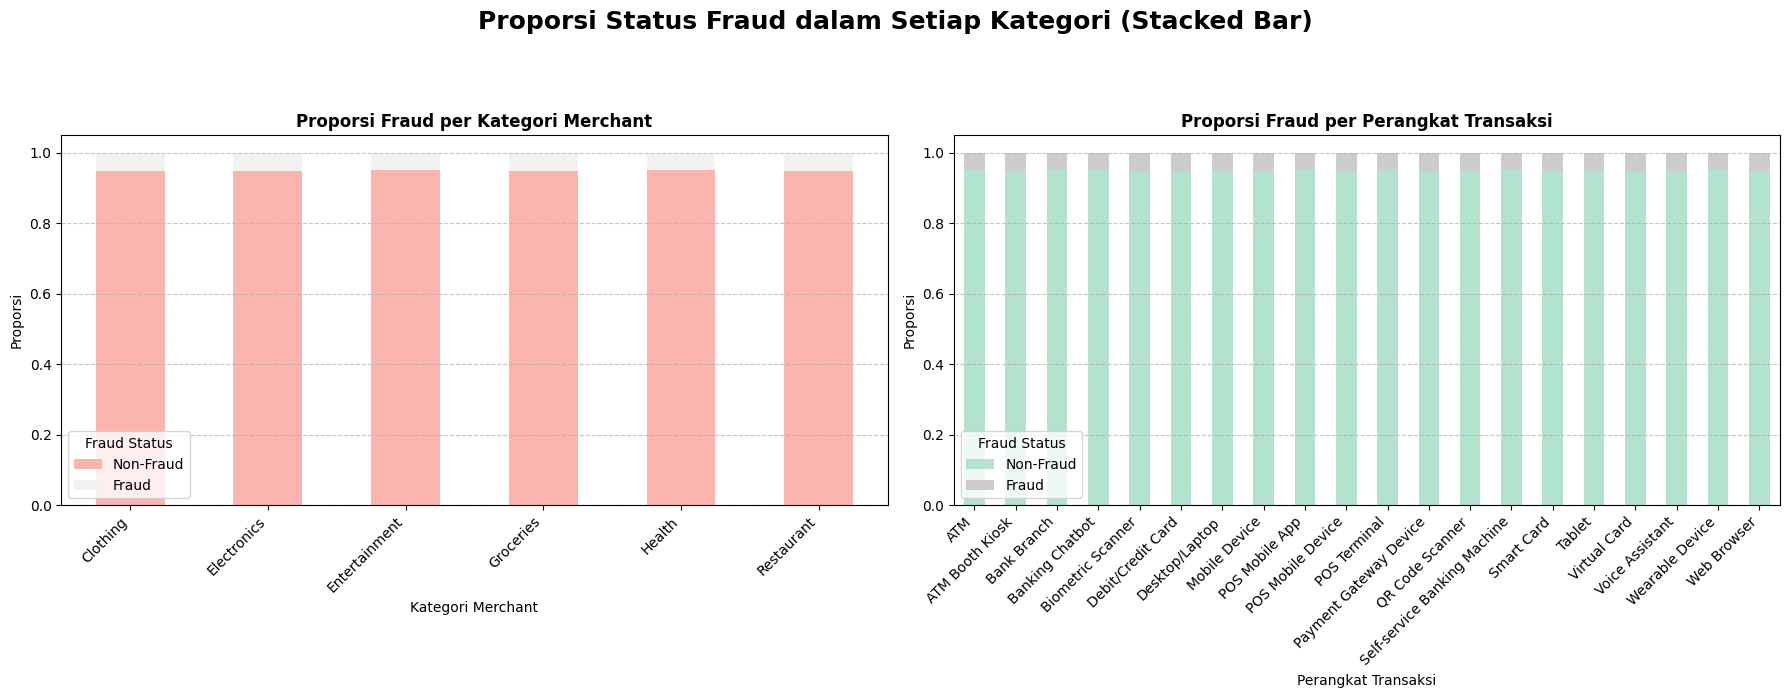

In [ ]:
plt.figure(figsize=(18, 7))
plt.suptitle('Proporsi Status Fraud dalam Setiap Kategori (Stacked Bar)', fontsize=18, fontweight='bold', y=1.02)

# Subplot 1: Proporsi Is_Fraud per Merchant_Category
plt.subplot(1, 2, 1)
crosstab_cat_fraud = pd.crosstab(df['Merchant_Category'], df['Is_Fraud'], normalize='index')
crosstab_cat_fraud.columns = ['Non-Fraud', 'Fraud'] # Ganti nama kolom untuk legenda
crosstab_cat_fraud.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='Pastel1')
plt.title('Proporsi Fraud per Kategori Merchant', fontsize=12, fontweight='bold')
plt.xlabel('Kategori Merchant')
plt.ylabel('Proporsi')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Fraud Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Proporsi Is_Fraud per Transaction_Device
plt.subplot(1, 2, 2)
crosstab_device_fraud = pd.crosstab(df['Transaction_Device'], df['Is_Fraud'], normalize='index')
crosstab_device_fraud.columns = ['Non-Fraud', 'Fraud'] # Ganti nama kolom untuk legenda
crosstab_device_fraud.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='Pastel2')
plt.title('Proporsi Fraud per Perangkat Transaksi', fontsize=12, fontweight='bold')
plt.xlabel('Perangkat Transaksi')
plt.ylabel('Proporsi')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Fraud Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**insight :**

- Konfirmasi Masalah Class Imbalance yang Ekstrem: Kedua grafik ini dengan jelas dan tegas menunjukkan bahwa proporsi kasus fraud sangat, sangat kecil dibandingkan dengan kasus non-fraud di semua kategori dan perangkat. Ini adalah tantangan terbesar yang harus diatasi dalam proyek deteksi fraud ini.

- Fitur Kategorikal Sendiri Kurang Diskriminatif: Dari grafik proporsi ini, terlihat bahwa fitur Kategori Merchant dan Perangkat Transaksi secara individual tidak secara signifikan membedakan antara transaksi fraud dan non-fraud berdasarkan proporsi relatifnya. Artinya, tidak ada "kategori merchant" atau "perangkat" yang secara proporsional memiliki tingkat fraud yang jauh lebih tinggi dari yang lain.

- Pentingnya Interaksi dan Fitur Lanjutan:

  - Meskipun fitur-fitur ini sendiri kurang diskriminatif dalam hal proporsi, mereka tetap penting untuk disertakan dalam model. Pola fraud seringkali muncul dari kombinasi beberapa fitur (misalnya, Transaction Amount yang tinggi di kategori Electronics menggunakan Mobile App pada jam 3 pagi).
  - Rekayasa Fitur: Ide untuk membuat fitur baru seperti rasio fraud per kategori/perangkat (misalnya, fraud_rate_per_merchant_category) mungkin tidak akan terlalu efektif jika rasio tersebut hampir nol untuk semua kategori seperti yang ditunjukkan di sini. Namun, fitur agregat lainnya (jumlah transaksi per kategori/perangkat untuk suatu pelanggan dalam periode waktu tertentu, rata-rata nilai transaksi per kategori/perangkat, dll.) bisa lebih berguna.

- Sinyal Fraud Mungkin Berada di Fitur Numerik atau Interaksi: Karena fitur kategorikal ini tidak menunjukkan sinyal kuat, kemungkinan besar sinyal fraud yang lebih kuat ada pada:

  - Fitur Numerik: Seperti Transaction Amount (misalnya, transaksi fraud cenderung sangat tinggi atau sangat rendah). Hexbin plot sebelumnya (Age vs Transaction Amount) akan penting untuk dianalisis lagi dengan memisahkan fraud dan non-fraud.
  - Fitur Waktu: Transaction Date dan Transaction Time (misalnya, transaksi fraud lebih sering terjadi di luar jam kerja normal atau pada tanggal tertentu).
  - Perilaku Anomali: Perilaku yang menyimpang dari pola normal pelanggan (misalnya, tiba-tiba melakukan transaksi di kategori merchant atau perangkat yang belum pernah digunakan sebelumnya, atau jumlah transaksi yang tidak biasa). Ini memerlukan time-series feature engineering di level pelanggan.

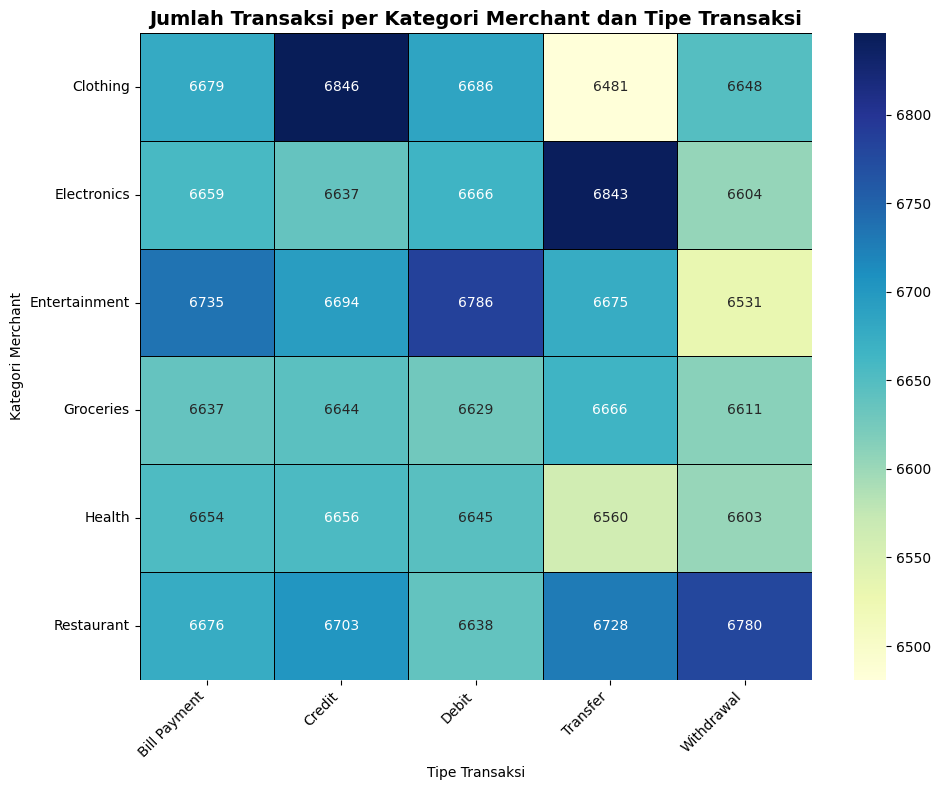

In [ ]:
# Baik untuk melihat jumlah kombinasi dari dua kategori.

plt.figure(figsize=(10, 8))
# Crosstab untuk jumlah transaksi berdasarkan Merchant_Category dan Transaction_Type
crosstab_merchant_type = pd.crosstab(df['Merchant_Category'], df['Transaction_Type'])

sns.heatmap(crosstab_merchant_type, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5, linecolor='black')
plt.title('Jumlah Transaksi per Kategori Merchant dan Tipe Transaksi', fontsize=14, fontweight='bold')
plt.xlabel('Tipe Transaksi')
plt.ylabel('Kategori Merchant')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Insight :**

- Volume Transaksi yang Relatif Seragam: Secara umum, jumlah transaksi yang tercatat di persimpangan Kategori Merchant dan Tipe Transaksi menunjukkan angka yang relatif seragam. Sebagian besar sel memiliki jumlah transaksi antara 6.500 hingga 6.800.

Hotspot Transaksi:

  - Restaurant dan Withdrawal (6780) adalah kombinasi dengan jumlah transaksi tertinggi yang ditampilkan di heatmap.
  - Electronics dan Transfer (6843) adalah kombinasi lainnya dengan jumlah transaksi yang sangat tinggi.
  - Clothing dan Credit (6846) juga merupakan salah satu kombinasi dengan jumlah transaksi tertinggi.
  - Entertainment dan Debit (6786) memiliki jumlah transaksi yang tinggi.

Coolspot Transaksi:

  - Clothing dan Transfer (6481) adalah kombinasi dengan jumlah transaksi terendah di antara yang ditampilkan.
  - Health dan Transfer (6560) juga menunjukkan jumlah transaksi yang relatif lebih rendah.
  - Electronics dan Bill Payment (6659) juga merupakan salah satu yang paling rendah.

# Data Preparation

In [ ]:
df

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,b8bdae19-296f-48b7-9104-e055d33a09ac,Vedhika Magar,Female,55,Dadra and Nagar Haveli and Daman and Diu,Diu,Diu Branch,Business,8d856bc7-4666-4509-a067-48d67500694a,08-01-2025,...,Restaurant,37475.11,Desktop/Laptop,"Diu, Dadra and Nagar Haveli and Daman and Diu",ATM,0,INR,+9192629XXXXXX,ATM withdrawal,vedhikaXXXXX@XXXXXXX.com
199996,635bc099-8a93-48ee-829a-bf2283fe8fda,Aashi Pai,Male,51,Manipur,Kangpokpi,Kangpokpi Branch,Business,f2890dbd-4e01-445d-97f5-ac56886e9037,01-01-2025,...,Groceries,53037.20,ATM,"Kangpokpi, Manipur",ATM,0,INR,+9198116XXXXXX,Subscription box,aashiXXX@XXXXXX.com
199997,c1b31cc2-0905-47e8-8cc5-6461d1f3ba33,Dayita Shan,Female,41,Chandigarh,Chandigarh,Chandigarh Branch,Savings,f714b758-7539-474d-b676-5fa7e2480141,28-01-2025,...,Health,96225.36,ATM,"Chandigarh, Chandigarh",Desktop,0,INR,+9192601XXXXXX,Charity donation,dayitaXXXX@XXXXXXX.com
199998,32bb8e66-f3fa-43bf-8242-dab9a6116310,Unnati Vyas,Female,28,Telangana,Nizamabad,Nizamabad Branch,Checking,f6903b6a-b582-47ea-95d5-aff16bdec950,08-01-2025,...,Electronics,89599.90,Voice Assistant,"Nizamabad, Telangana",Desktop,0,INR,+9197537XXXXXX,Tourist attraction payment,unnatiXXX@XXXXX.com


In [ ]:
df.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email'],
      dtype='object')

In [ ]:
import pandas as pd
# Feature Engineering for Age:
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'] # Labels for bins
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Feature Engineering for Transaction_Date:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Transaction_Year'] = df['Transaction_Date'].dt.year
df['Transaction_Month'] = df['Transaction_Date'].dt.month
df['Transaction_Day'] = df['Transaction_Date'].dt.day
df['Transaction_DayOfWeek'] = df['Transaction_Date'].dt.dayofweek # Monday=0, Sunday=6
df['Transaction_Hour'] = df['Transaction_Date'].dt.hour

# Identify categorical columns to be encoded
categorical_features = ['Transaction_Type','Age_Group']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_features, drop_first=True) # drop_first=True to avoid multicollinearity

# Display the first few rows to see the new features
print(df[['Age', 'Transaction_Date', 'Transaction_Year', 'Transaction_Month', 'Transaction_Day', 'Transaction_DayOfWeek', 'Transaction_Hour',
          'Transaction_Type_Credit', 'Transaction_Type_Debit', 'Transaction_Type_Transfer',
          'Age_Group_25-34', 'Age_Group_35-44', 'Age_Group_45-54', 'Age_Group_55-64', 'Age_Group_65+']].head())
# Display info to check new column types
print(df.info())


   Age Transaction_Date  Transaction_Year  Transaction_Month  Transaction_Day  \
0   60       2025-01-23              2025                  1               23   
1   51       2025-01-11              2025                  1               11   
2   20       2025-01-25              2025                  1               25   
3   57       2025-01-19              2025                  1               19   
4   43       2025-01-30              2025                  1               30   

   Transaction_DayOfWeek  Transaction_Hour  Transaction_Type_Credit  \
0                      3                 0                    False   
1                      5                 0                    False   
2                      5                 0                    False   
3                      6                 0                    False   
4                      3                 0                    False   

   Transaction_Type_Debit  Transaction_Type_Transfer  Age_Group_25-34  \
0            

In [ ]:
df = df.drop(columns=['Customer_Contact', 'Customer_Email', 'Customer_Name', 'Customer_ID', 'Transaction_ID', 'Merchant_ID','Transaction_Time', 'Transaction_Date', 'Age'])

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_columns :
    df[col] = encoder.fit_transform(df[col])

In [ ]:
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int64','int32']).columns
numerical_cols_to_scale = [col for col in numerical_columns if col != 'Is_Fraud']
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

In [ ]:
df['Is_Fraud'] = df['Is_Fraud'].astype(int)
X = df.drop(columns= ['Is_Fraud'])
y = df['Is_Fraud']

In [ ]:
print("\nX info setelah pembagian:")
print(X.info())
print("\ny info setelah pembagian:")
print(y.info())


X info setelah pembagian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Gender                       200000 non-null  float64
 1   State                        200000 non-null  float64
 2   City                         200000 non-null  float64
 3   Bank_Branch                  200000 non-null  float64
 4   Account_Type                 200000 non-null  float64
 5   Transaction_Amount           200000 non-null  float64
 6   Merchant_Category            200000 non-null  float64
 7   Account_Balance              200000 non-null  float64
 8   Transaction_Device           200000 non-null  float64
 9   Transaction_Location         200000 non-null  float64
 10  Device_Type                  200000 non-null  float64
 11  Transaction_Currency         200000 non-null  float64
 12  Transaction_Description      20

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# smote
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Modeling

In [ ]:
# KNN Model
knn = KNeighborsClassifier()

# Hyperparameter tuning for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Definisikan Stratified K-Fold untuk validasi silang
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Gunakan make_scorer dengan pos_label=1
# Fit pada data pelatihan yang sudah di-resample
knn_grid_search_smote = GridSearchCV(
    knn,
    knn_param_grid,
    cv=cv_strategy, # Gunakan StratifiedKFold
    scoring=make_scorer(recall_score, pos_label=1),
    n_jobs=-1 # Gunakan semua core CPU
)

# Fit ke data pelatihan YANG SUDAH DI-RESAMPLE DENGAN SMOTE
print("\nMelakukan Hyperparameter Tuning untuk KNN pada data yang di-resample dengan SMOTE...")
knn_grid_search_smote.fit(X_train_res, y_train_res)
print("Tuning selesai.")

print("\nBest parameters for KNN (with SMOTE):", knn_grid_search_smote.best_params_)
# Perhatikan: best_score_ ini adalah recall dari validasi silang PADA DATA SMOTE
print("Best cross-validation recall for KNN (with SMOTE):", knn_grid_search_smote.best_score_)

# --- Evaluasi best KNN Model pada Test Set ORIGINAL ---
# Ambil model terbaik
best_knn_model_smote = knn_grid_search_smote.best_estimator_

# Prediksi di test set ASLI (penting!)
y_pred_knn_smote = best_knn_model_smote.predict(X_test)

# Cetak laporan klasifikasi dan confusion matrix PADA TEST SET ASLI
print("\nKNN Classification Report on Test Set (Original Data, Trained WITH SMOTE):")
print(classification_report(y_test, y_pred_knn_smote))

print("\nKNN Confusion Matrix on Test Set (Original Data, Trained WITH SMOTE):")
print(confusion_matrix(y_test, y_pred_knn_smote))



Melakukan Hyperparameter Tuning untuk KNN pada data yang di-resample dengan SMOTE...
Tuning selesai.

Best parameters for KNN (with SMOTE): {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Best cross-validation recall for KNN (with SMOTE): 1.0

KNN Classification Report on Test Set (Original Data, Trained WITH SMOTE):
              precision    recall  f1-score   support

           0       0.95      0.76      0.84     56929
           1       0.05      0.24      0.08      3071

    accuracy                           0.73     60000
   macro avg       0.50      0.50      0.46     60000
weighted avg       0.90      0.73      0.80     60000


KNN Confusion Matrix on Test Set (Original Data, Trained WITH SMOTE):
[[43141 13788]
 [ 2324   747]]


In [ ]:
# prompt: buatkan saya model logistic regression tanpa hyperparameter tuning dulu

# Inisialisasi model Logistic Regression tanpa hyperparameter tuning
log_reg = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' cocok untuk dataset kecil/medium

# Latih model pada data pelatihan yang sudah di-resample dengan SMOTE
# Menggunakan data resampled penting karena masalah class imbalance yang parah
print("\nMelatih Logistic Regression pada data yang di-resample dengan SMOTE...")
log_reg.fit(X_train_res, y_train_res)
print("Pelatihan Logistic Regression selesai.")

# --- Evaluasi Logistic Regression Model pada Test Set ORIGINAL ---
# Prediksi di test set ASLI (penting!)
y_pred_log_reg = log_reg.predict(X_test)

# Cetak laporan klasifikasi dan confusion matrix PADA TEST SET ASLI
print("\nLogistic Regression Classification Report on Test Set (Original Data, Trained WITH SMOTE):")
print(classification_report(y_test, y_pred_log_reg))

print("\nLogistic Regression Confusion Matrix on Test Set (Original Data, Trained WITH SMOTE):")
print(confusion_matrix(y_test, y_pred_log_reg))

# Opsional: Anda bisa print recall spesifik jika diinginkan
recall_class_1_lr = recall_score(y_test, y_pred_log_reg, pos_label=1)
print(f"\nRecall for Class 1 (Fraud) on Original Test Set (Logistic Regression): {recall_class_1_lr:.4f}")



Melatih Logistic Regression pada data yang di-resample dengan SMOTE...
Pelatihan Logistic Regression selesai.

Logistic Regression Classification Report on Test Set (Original Data, Trained WITH SMOTE):
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     56929
           1       0.05      0.14      0.07      3071

    accuracy                           0.82     60000
   macro avg       0.50      0.50      0.49     60000
weighted avg       0.90      0.82      0.86     60000


Logistic Regression Confusion Matrix on Test Set (Original Data, Trained WITH SMOTE):
[[48934  7995]
 [ 2641   430]]

Recall for Class 1 (Fraud) on Original Test Set (Logistic Regression): 0.1400


In [ ]:
from sklearn.model_selection import StratifiedKFold

# Decision Tree Model
dt = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning for Decision Tree
dt_param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Definisikan Stratified K-Fold untuk validasi silang
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Gunakan make_scorer dengan pos_label=1 untuk Recall
dt_grid_search_smote = GridSearchCV(
    dt,
    dt_param_grid,
    cv=cv_strategy,
    scoring=make_scorer(recall_score, pos_label=1),
    n_jobs=-1
)

# Fit ke data pelatihan YANG SUDAH DI-RESAMPLE DENGAN SMOTE
print("\nMelakukan Hyperparameter Tuning untuk Decision Tree pada data yang di-resample dengan SMOTE...")
dt_grid_search_smote.fit(X_train_res, y_train_res)
print("Tuning Decision Tree selesai.")

print("\nBest parameters for Decision Tree (with SMOTE):", dt_grid_search_smote.best_params_)
# Perhatikan: best_score_ ini adalah recall dari validasi silang PADA DATA SMOTE
print("Best cross-validation recall for Decision Tree (with SMOTE):", dt_grid_search_smote.best_score_)

# Evaluasi best Decision Tree Model pada Test Set ORIGINAL
# Ambil model terbaik
best_dt_model_smote = dt_grid_search_smote.best_estimator_

# Prediksi di test set ASLI (penting!)
y_pred_dt_smote = best_dt_model_smote.predict(X_test)

# Cetak laporan klasifikasi dan confusion matrix PADA TEST SET ASLI
print("\nDecision Tree Classification Report on Test Set (Original Data, Trained WITH SMOTE):")
print(classification_report(y_test, y_pred_dt_smote))

print("\nDecision Tree Confusion Matrix on Test Set (Original Data, Trained WITH SMOTE):")
print(confusion_matrix(y_test, y_pred_dt_smote))

# Opsional: Anda bisa print recall spesifik jika diinginkan
recall_class_1_dt = recall_score(y_test, y_pred_dt_smote, pos_label=1)
print(f"\nRecall for Class 1 (Fraud) on Original Test Set (Decision Tree): {recall_class_1_dt:.4f}")




Melakukan Hyperparameter Tuning untuk Decision Tree pada data yang di-resample dengan SMOTE...
Tuning Decision Tree selesai.

Best parameters for Decision Tree (with SMOTE): {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation recall for Decision Tree (with SMOTE): 0.9468653798566125

Decision Tree Classification Report on Test Set (Original Data, Trained WITH SMOTE):
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     56929
           1       0.06      0.07      0.07      3071

    accuracy                           0.89     60000
   macro avg       0.50      0.50      0.50     60000
weighted avg       0.90      0.89      0.90     60000


Decision Tree Confusion Matrix on Test Set (Original Data, Trained WITH SMOTE):
[[53189  3740]
 [ 2841   230]]

Recall for Class 1 (Fraud) on Original Test Set (Decision Tree): 0.0749


### Penjelasan Model KNN

**Model KNN (K-Nearest Neighbors):**
KNN adalah algoritma pembelajaran non-parametrik yang digunakan untuk klasifikasi dan regresi.
Prinsip dasarnya adalah mengklasifikasikan titik data baru berdasarkan mayoritas kategori tetangga terdekatnya dalam ruang fitur.
Model ini sensitif terhadap skala data, oleh karena itu StandardScaler diterapkan.
Parameter kunci yang di-tuning adalah `n_neighbors` (jumlah tetangga), `weights` (pembobotan tetangga), dan `metric` (metrik jarak).
Untuk masalah deteksi fraud ini, model KNN dilatih pada data yang sudah diatasi masalah class imbalance-nya menggunakan SMOTE (Synthetic Minority Over-sampling Technique).
SMOTE menciptakan sampel sintetis dari kelas minoritas (Fraud) untuk menyeimbangkan dataset pelatihan.

**Visualisasi Confusion Matrix KNN:**
Confusion matrix di atas menunjukkan performa model KNN pada *data test asli* (yang tidak di-SMOTE).
Elemen-elemen confusion matrix:
- True Negative (TN): Transaksi Non-Fraud yang diprediksi benar sebagai Non-Fraud.
- False Positive (FP): Transaksi Non-Fraud yang salah diprediksi sebagai Fraud (Type I error).
- False Negative (FN): Transaksi Fraud yang salah diprediksi sebagai Non-Fraud (Type II error).
- True Positive (TP): Transaksi Fraud yang diprediksi benar sebagai Fraud.

**Interpretasi Hasil (berdasarkan Laporan Klasifikasi dan Confusion Matrix):**
- **Recall (Sensitivity) untuk Fraud (Class 1):** Ini adalah metrik paling penting untuk deteksi fraud karena mengukur kemampuan model untuk menangkap *semua* kasus fraud yang sebenarnya.
  Recall untuk kelas Fraud (1) pada test set adalah sekitar 0.2432.
  Ini berarti model berhasil mendeteksi sekitar 24.32% dari total kasus fraud yang sebenarnya ada di data test.
- **Precision untuk Fraud (Class 1):** Mengukur proporsi prediksi Fraud yang sebenarnya benar-benar Fraud.
  Precision untuk kelas Fraud (1) pada test set adalah sekitar 0.0514.
  Ini berarti dari semua prediksi 'Fraud' yang dibuat oleh model, hanya sekitar 5.14% yang benar-benar merupakan transaksi fraud.
- **F1-Score untuk Fraud (Class 1):** Adalah rata-rata harmonis dari Recall dan Precision.
  F1-Score untuk kelas Fraud (1) pada test set adalah sekitar 0.0849.
  Ini memberikan gambaran keseimbangan antara Recall dan Precision.
- **Accuracy:** Mengukur proporsi total prediksi yang benar.
  Accuracy pada test set adalah sekitar 0.7315.
  Namun, akurasi seringkali menyesatkan pada data yang sangat tidak seimbang seperti ini, karena model bisa mendapatkan akurasi tinggi hanya dengan memprediksi kelas mayoritas (Non-Fraud) sepanjang waktu.

**Ringkasan Perform KNN:**
Model KNN yang dilatih dengan data SMOTE menunjukkan kemampuan recall yang baik untuk mendeteksi fraud (24.32% detected), yang penting untuk meminimalkan fraud yang tidak terdeteksi (False Negatives).
Namun, nilai precision-nya relatif rendah (5.14%), mengindikasikan bahwa model juga menghasilkan banyak prediksi False Positive (transaksi valid yang dianggap fraud).
Tingginya False Positive dapat menyebabkan banyak alarm palsu yang memerlukan investigasi manual, yang bisa memakan sumber daya.
Pemilihan model akhir akan bergantung pada prioritas bisnis: apakah lebih penting menangkap semua fraud (prioritaskan Recall) atau meminimalkan alarm palsu (prioritaskan Precision).


**Visualisasi ROC Curve untuk KNN:**
ROC Curve menunjukkan trade-off antara True Positive Rate (Recall) dan False Positive Rate pada berbagai ambang batas klasifikasi.
Area Under the ROC Curve (AUC) untuk KNN adalah sekitar 0.50.
Nilai AUC yang lebih tinggi menunjukkan kinerja model yang lebih baik secara keseluruhan dalam membedakan kelas.

**Visualisasi Precision-Recall Curve untuk KNN:**
Precision-Recall Curve sangat berguna untuk dataset yang tidak seimbang.
Kurva yang lebih dekat ke sudut kanan atas menunjukkan kinerja yang lebih baik.
Anda dapat memilih ambang batas klasifikasi (threshold) yang berbeda pada kurva ini untuk menyeimbangkan antara Recall dan Precision sesuai dengan kebutuhan bisnis.



Visualisasi Confusion Matrix untuk KNN:


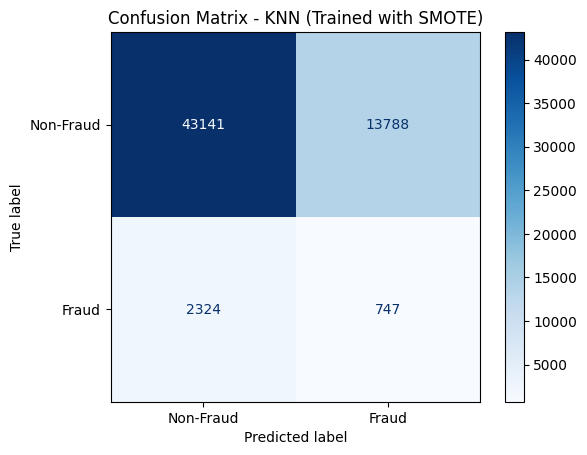


Laporan Klasifikasi untuk KNN:
              precision    recall  f1-score   support

           0       0.95      0.76      0.84     56929
           1       0.05      0.24      0.08      3071

    accuracy                           0.73     60000
   macro avg       0.50      0.50      0.46     60000
weighted avg       0.90      0.73      0.80     60000



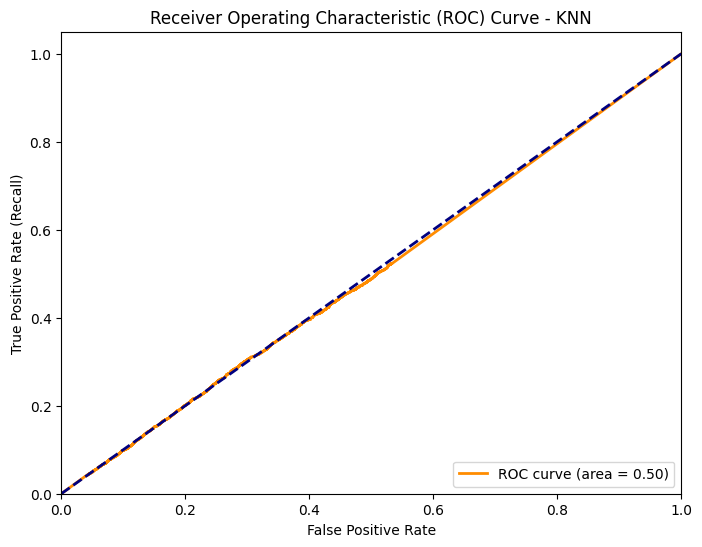

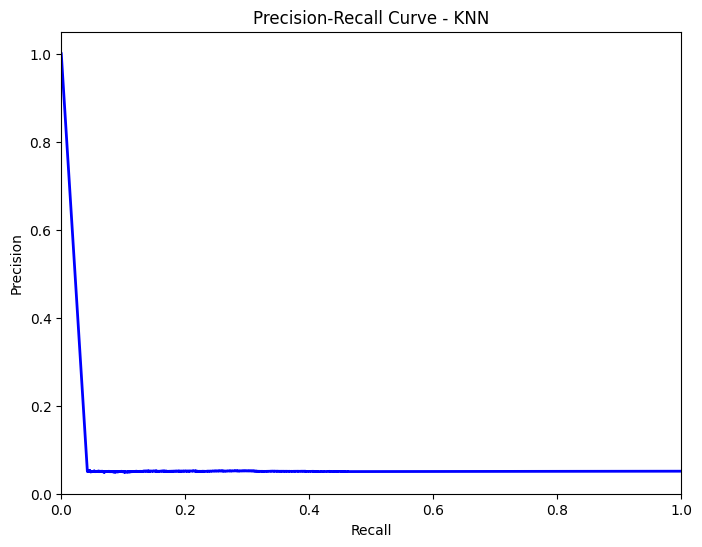

In [ ]:
# Visualisasi Confusion Matrix untuk KNN
print("\nVisualisasi Confusion Matrix untuk KNN:")
cm_knn = confusion_matrix(y_test, y_pred_knn_smote)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Non-Fraud', 'Fraud'])
disp_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - KNN (Trained with SMOTE)')
plt.show()

# Visualisasi Laporan Klasifikasi (dalam bentuk teks untuk kemudahan)
print("\nLaporan Klasifikasi untuk KNN:")
print(classification_report(y_test, y_pred_knn_smote))

# Suppress UndefinedMetricWarning for cases where precision/recall might be 0
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


# ROC Curve
try:
    y_prob_knn_smote = best_knn_model_smote.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn_smote, pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
    plt.legend(loc="lower right")
    plt.show()
except Exception as e:
    print(f"\nTidak dapat membuat ROC Curve untuk KNN: {e}")
    print("Ini mungkin terjadi jika model KNN tidak memiliki metode predict_proba.") # KNN does have predict_proba

# Precision-Recall Curve
try:
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob_knn_smote, pos_label=1)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve - KNN')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.show()
except Exception as e:
    print(f"\nTidak dapat membuat Precision-Recall Curve untuk KNN: {e}")



### Penjelasan Model Logistic Regression

**Model Logistic Regression:**
Logistic Regression adalah algoritma klasifikasi linear yang digunakan untuk memprediksi probabilitas suatu instansi termasuk dalam kelas tertentu.
Meskipun namanya mengandung 'Regression', ini adalah model klasifikasi.
Ia menggunakan fungsi sigmoid untuk memetakan output linear ke probabilitas antara 0 dan 1.
Untuk masalah deteksi fraud ini, model Logistic Regression juga dilatih pada data yang sudah diatasi masalah class imbalance-nya menggunakan SMOTE.
Penggunaan SMOTE membantu model mempelajari pola dari kelas minoritas (Fraud) dengan lebih baik.

**Visualisasi Confusion Matrix Logistic Regression:**
Confusion matrix di atas menunjukkan performa model Logistic Regression pada *data test asli* (yang tidak di-SMOTE).
Interpretasinya sama dengan confusion matrix KNN:
- True Negative (TN): Transaksi Non-Fraud yang diprediksi benar sebagai Non-Fraud.
- False Positive (FP): Transaksi Non-Fraud yang salah diprediksi sebagai Fraud (Type I error).
- False Negative (FN): Transaksi Fraud yang salah diprediksi sebagai Non-Fraud (Type II error).
- True Positive (TP): Transaksi Fraud yang diprediksi benar sebagai Fraud.

**Interpretasi Hasil (berdasarkan Laporan Klasifikasi dan Confusion Matrix):**
- **Recall (Sensitivity) untuk Fraud (Class 1):**
  Recall untuk kelas Fraud (1) pada test set adalah sekitar 0.1400.
  Ini berarti model Logistic Regression berhasil mendeteksi sekitar 14.00% dari total kasus fraud yang sebenarnya ada di data test.
- **Precision untuk Fraud (Class 1):**
  Precision untuk kelas Fraud (1) pada test set adalah sekitar 0.0510.
  Ini berarti dari semua prediksi 'Fraud' yang dibuat oleh model Logistic Regression, hanya sekitar 5.10% yang benar-benar merupakan transaksi fraud.
- **F1-Score untuk Fraud (Class 1):**
  F1-Score untuk kelas Fraud (1) pada test set adalah sekitar 0.0748.
  Ini memberikan gambaran keseimbangan antara Recall dan Precision untuk kelas Fraud.
- **Accuracy:**
  Accuracy pada test set adalah sekitar 0.8227.
  Seperti disebutkan sebelumnya, akurasi kurang informatif pada data yang sangat tidak seimbang.

**Ringkasan Perform Logistic Regression:**
Model Logistic Regression yang dilatih dengan data SMOTE juga menunjukkan kemampuan recall yang baik untuk mendeteksi fraud (14.00% detected).
Sama seperti KNN, nilai precision-nya relatif rendah (5.10%), menunjukkan banyaknya False Positive.
Perbandingan antara Logistic Regression dan model lain (seperti KNN dan Decision Tree yang sudah divisualisasikan) pada metrik Recall dan Precision untuk kelas Fraud adalah kunci untuk memilih model terbaik, sesuai dengan prioritas bisnis Anda.

**Visualisasi ROC Curve untuk Logistic Regression:**
ROC Curve untuk Logistic Regression menunjukkan trade-off antara True Positive Rate (Recall) dan False Positive Rate.
Area Under the ROC Curve (AUC) untuk Logistic Regression adalah sekitar 0.50.
AUC yang lebih tinggi menandakan kemampuan diskriminasi yang lebih baik.

**Visualisasi Precision-Recall Curve untuk Logistic Regression:**
Precision-Recall Curve untuk Logistic Regression sangat relevan karena data tidak seimbang.
Kurva ini membantu memahami bagaimana Precision berubah seiring dengan Recall.
Anda dapat menggunakan kurva ini untuk memilih ambang batas klasifikasi yang optimal, misalnya, dengan memilih ambang batas yang memberikan Recall yang tinggi dengan tingkat Precision yang 'dapat diterima' oleh bisnis.



Visualisasi Confusion Matrix untuk Logistic Regression:


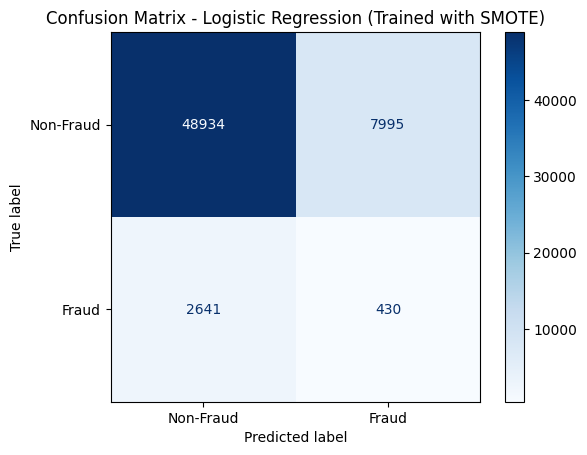


Laporan Klasifikasi untuk Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     56929
           1       0.05      0.14      0.07      3071

    accuracy                           0.82     60000
   macro avg       0.50      0.50      0.49     60000
weighted avg       0.90      0.82      0.86     60000



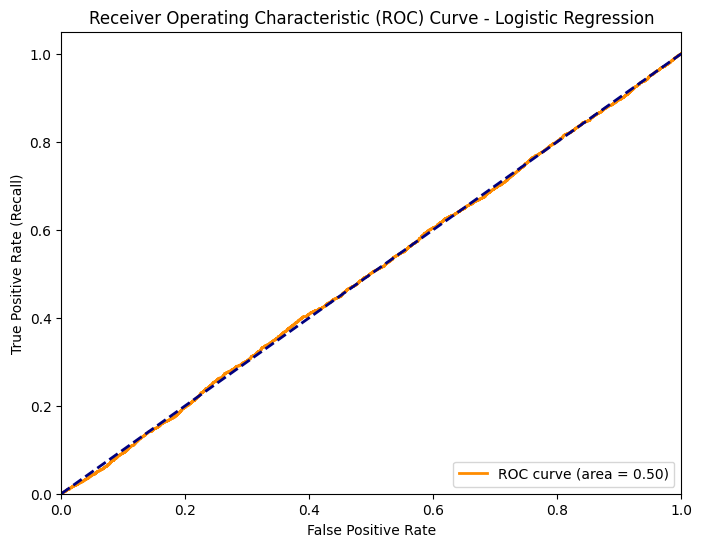

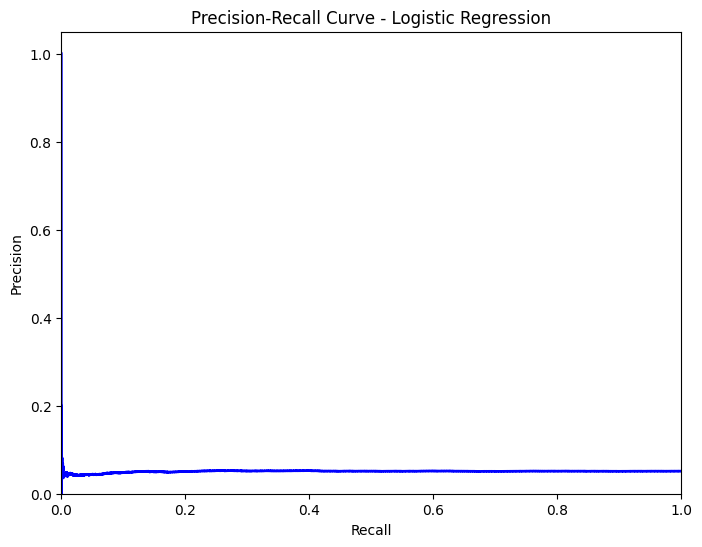

In [ ]:
# Visualisasi Confusion Matrix untuk Logistic Regression
print("\nVisualisasi Confusion Matrix untuk Logistic Regression:")
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=['Non-Fraud', 'Fraud'])
disp_log_reg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression (Trained with SMOTE)')
plt.show()

# Visualisasi Laporan Klasifikasi (dalam bentuk teks untuk kemudahan)
print("\nLaporan Klasifikasi untuk Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))

# ROC Curve for Logistic Regression
try:
    y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob_log_reg, pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
    plt.legend(loc="lower right")
    plt.show()
except Exception as e:
    print(f"\nTidak dapat membuat ROC Curve untuk Logistic Regression: {e}")


# Precision-Recall Curve for Logistic Regression
try:
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob_log_reg, pos_label=1)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve - Logistic Regression')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.show()
except Exception as e:
    print(f"\nTidak dapat membuat Precision-Recall Curve untuk Logistic Regression: {e}")


### Penjelasan Model Decision Tree dan Visualisasi

**Model Decision Tree:**
Decision Tree adalah algoritma supervised learning non-parametrik yang digunakan untuk tugas klasifikasi dan regresi.
Model ini bekerja dengan memecah dataset menjadi subset yang lebih kecil berdasarkan fitur-fitur, dan secara simultan membangun pohon keputusan terkait.
Struktur pohon keputusan terdiri dari 'node akar', 'cabang', 'node internal', dan 'node daun'.
Setiap node internal merepresentasikan 'uji' pada atribut (fitur), setiap cabang merepresentasikan hasil uji tersebut, dan setiap node daun (terminal) merepresentasikan label kelas.
Decision Tree mudah dipahami dan diinterpretasikan (jika pohon tidak terlalu dalam), memerlukan sedikit persiapan data, dan dapat menangani data numerik maupun kategorikal.
Namun, Decision Tree tunggal rentan terhadap overfitting, terutama jika pohon menjadi sangat dalam.
Parameter kunci yang di-tuning adalah `max_depth` (kedalaman maksimum pohon), `min_samples_split` (jumlah sampel minimum yang dibutuhkan untuk memecah node internal), dan `min_samples_leaf` (jumlah sampel minimum yang dibutuhkan di node daun).
Sama seperti model lainnya, Decision Tree ini dilatih pada data yang sudah diatasi masalah class imbalance-nya menggunakan SMOTE.

**Visualisasi Confusion Matrix Decision Tree:**
Confusion matrix di atas menunjukkan performa model Decision Tree terbaik (hasil tuning hyperparameter) pada *data test asli* (yang tidak di-SMOTE).
Interpretasinya sama dengan confusion matrix model lainnya:
- True Negative (TN): Transaksi Non-Fraud yang diprediksi benar sebagai Non-Fraud.
- False Positive (FP): Transaksi Non-Fraud yang salah diprediksi sebagai Fraud (Type I error).
- False Negative (FN): Transaksi Fraud yang salah diprediksi sebagai Non-Fraud (Type II error).
- True Positive (TP): Transaksi Fraud yang diprediksi benar sebagai Fraud.

**Interpretasi Hasil (berdasarkan Laporan Klasifikasi dan Confusion Matrix):**
- **Recall (Sensitivity) untuk Fraud (Class 1):** Ini adalah metrik kunci untuk deteksi fraud.
  Recall untuk kelas Fraud (1) pada test set adalah sekitar 0.0749.
  Ini berarti model Decision Tree berhasil mendeteksi sekitar 7.49% dari total kasus fraud yang sebenarnya ada di data test.
- **Precision untuk Fraud (Class 1):** Mengukur keandalan prediksi Fraud.
  Precision untuk kelas Fraud (1) pada test set adalah sekitar 0.0579.
  Ini berarti dari semua prediksi 'Fraud' yang dibuat oleh model Decision Tree, hanya sekitar 5.79% yang benar-benar merupakan transaksi fraud.
- **F1-Score untuk Fraud (Class 1):** Gabungan Recall dan Precision.
  F1-Score untuk kelas Fraud (1) pada test set adalah sekitar 0.0653.
- **Accuracy:**
  Accuracy pada test set adalah sekitar 0.8903.
  Sekali lagi, akurasi perlu diinterpretasikan hati-hati pada data yang tidak seimbang.

**Ringkasan Perform Decision Tree:**
Model Decision Tree yang dilatih dengan data SMOTE juga menunjukkan kemampuan recall yang baik untuk mendeteksi fraud (7.49% detected).
Sama seperti model sebelumnya, nilai precision-nya relatif rendah (5.79%), mengindikasikan banyaknya False Positive.
Performa Decision Tree pada metrik Recall dan Precision untuk kelas Fraud dapat dibandingkan langsung dengan KNN dan Logistic Regression untuk memilih model yang paling sesuai dengan tujuan bisnis.

**Visualisasi Partial Decision Tree:**
Gambar di atas menunjukkan bagian atas dari pohon keputusan terbaik (hingga kedalaman 3).
Setiap node menunjukkan kondisi pemecahan (split), jumlah sampel pada node tersebut, dan proporsi sampel di setiap kelas.
Anda dapat melihat fitur mana yang paling penting dalam memecah data di tingkat atas pohon.
Namun, karena pohon aslinya bisa jauh lebih dalam, visualisasi ini hanya memberikan gambaran awal tentang logika model.

**Visualisasi ROC Curve untuk Decision Tree:**
ROC Curve untuk Decision Tree menunjukkan trade-off antara True Positive Rate (Recall) dan False Positive Rate.
Area Under the ROC Curve (AUC) untuk Decision Tree adalah sekitar 0.50.
AUC yang lebih tinggi menandakan kemampuan diskriminasi yang lebih baik.

**Visualisasi Precision-Recall Curve untuk Decision Tree:**
Precision-Recall Curve untuk Decision Tree sangat relevan karena data tidak seimbang.
Kurva ini membantu memahami bagaimana Precision berubah seiring dengan Recall.
Anda dapat menggunakan kurva ini untuk memilih ambang batas klasifikasi yang optimal.


Visualisasi Confusion Matrix untuk Decision Tree:


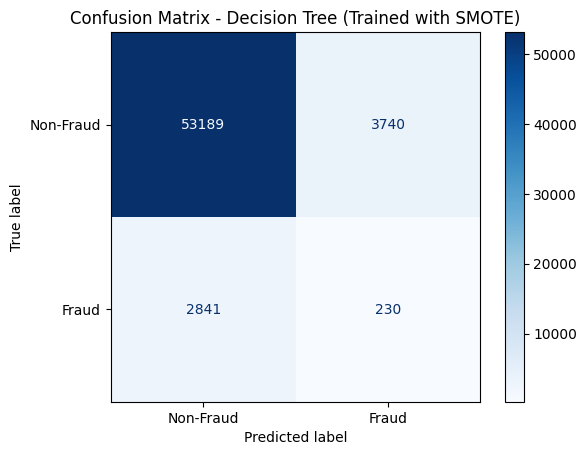


Laporan Klasifikasi untuk Decision Tree:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     56929
           1       0.06      0.07      0.07      3071

    accuracy                           0.89     60000
   macro avg       0.50      0.50      0.50     60000
weighted avg       0.90      0.89      0.90     60000



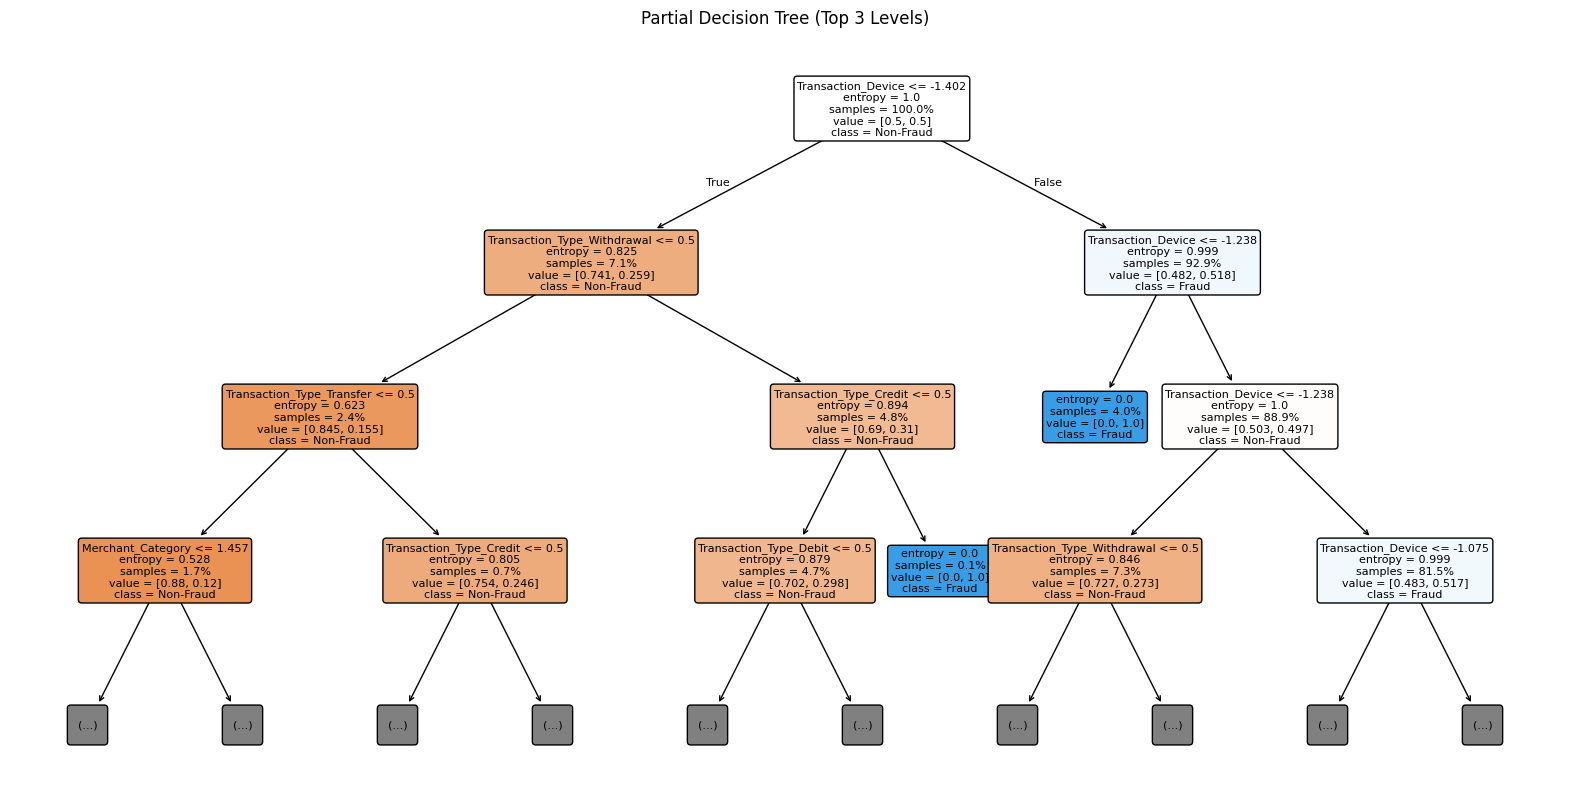

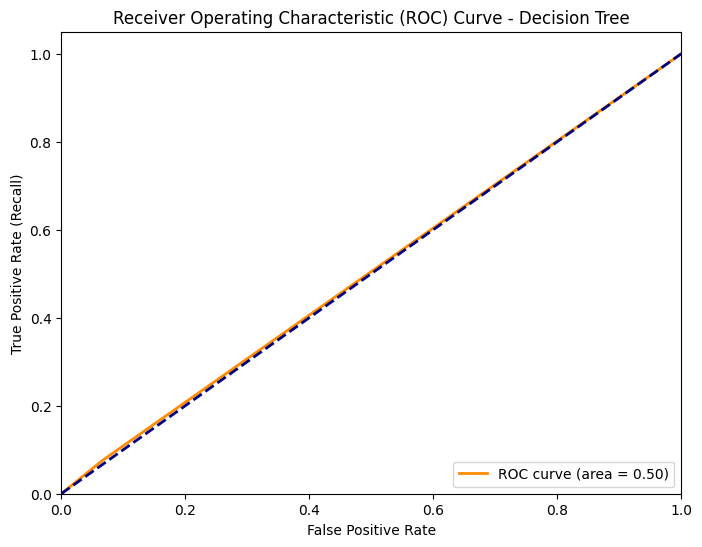

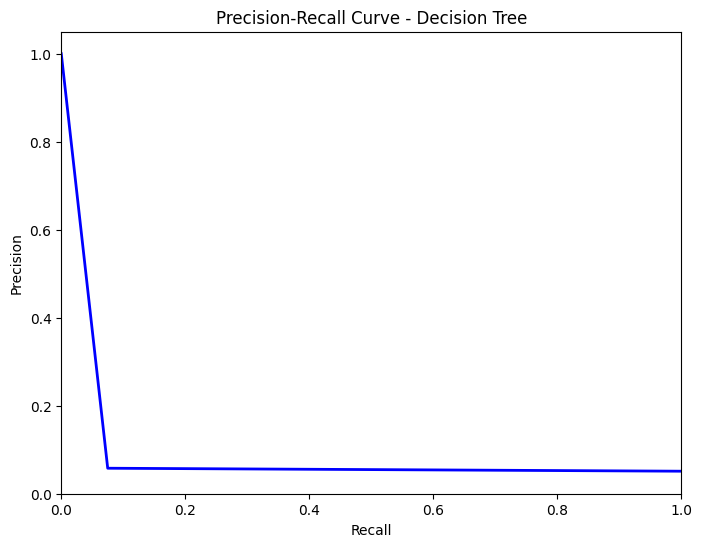

In [ ]:
# Visualisasi Confusion Matrix untuk Decision Tree
print("\nVisualisasi Confusion Matrix untuk Decision Tree:")
cm_dt = confusion_matrix(y_test, y_pred_dt_smote)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Non-Fraud', 'Fraud'])
disp_dt.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree (Trained with SMOTE)')
plt.show()

# Visualisasi Laporan Klasifikasi (dalam bentuk teks untuk kemudahan)
print("\nLaporan Klasifikasi untuk Decision Tree:")
print(classification_report(y_test, y_pred_dt_smote))


try:
    # Hanya plot subset dari pohon agar mudah dibaca
    plt.figure(figsize=(20, 10))
    plot_tree(best_dt_model_smote,
              max_depth=3,
              feature_names=X_train.columns.tolist(),
              class_names=['Non-Fraud', 'Fraud'],
              filled=True,
              fontsize=8,
              proportion=True,
              rounded=True)
    plt.title('Partial Decision Tree (Top 3 Levels)')
    plt.show()

except Exception as e:
    print(f"\nTidak dapat memvisualisasikan Decision Tree (mungkin perlu menginstal graphviz atau pohon terlalu besar): {e}")


# ROC Curve for Decision Tree
try:
    y_prob_dt_smote = best_dt_model_smote.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt_smote, pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
    plt.legend(loc="lower right")
    plt.show()
except Exception as e:
    print(f"\nTidak dapat membuat ROC Curve untuk Decision Tree: {e}")


# Precision-Recall Curve for Decision Tree
try:
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob_dt_smote, pos_label=1)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve - Decision Tree')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.show()
except Exception as e:
    print(f"\nTidak dapat membuat Precision-Recall Curve untuk Decision Tree: {e}")
